# ULTIMO PREPROCESAMIENTO

## Lectura de datos

In [1]:
!pip install imbalanced-learn

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
 
from pylab import rcParams
 
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline
 
from collections import Counter
from scipy.stats import shapiro
from scipy.stats import anderson
import statsmodels.api as sm

In [3]:
df = pd.read_csv('../data/dataframe_imputed.csv',sep=',', encoding='latin-1', index_col=0, low_memory=False)
df_edit = pd.read_csv('../data_edit/dataframe_edit_imputed.csv',sep=',', encoding='latin-1', index_col=0, low_memory=False)
df_2017 = pd.read_csv('../data/dataframe_2017_imputed.csv',sep=',', encoding='latin-1', index_col=0, low_memory=False)
df_edit_2017 = pd.read_csv('../data_edit/dataframe_2017_edit_imputed.csv',sep=',', encoding='latin-1', index_col=0, low_memory=False)

In [4]:
def correlation(df):
    corrmat = df.corr()
    f, ax = plt.subplots(figsize=(12, 9))
    sns.heatmap(corrmat, vmax=.8, annot = True, fmt = '.2f', annot_kws = {'size': 10}, square=True);

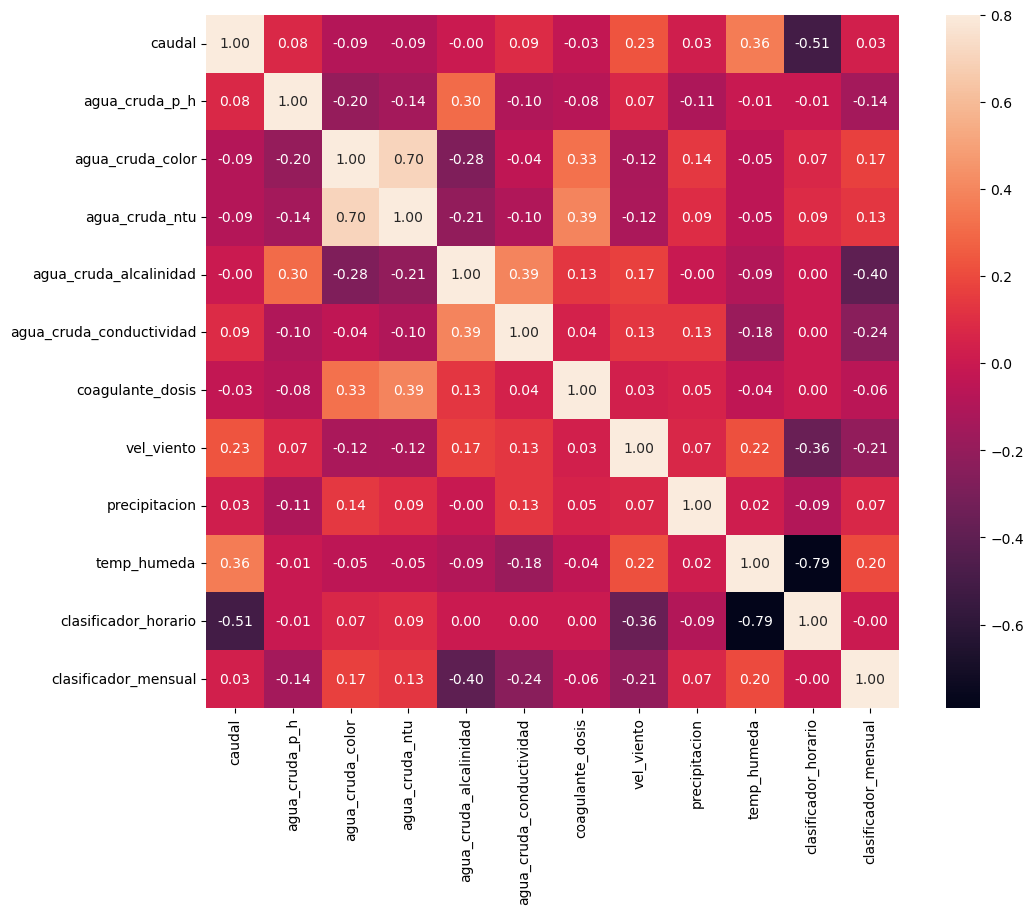

In [5]:
correlation(df)

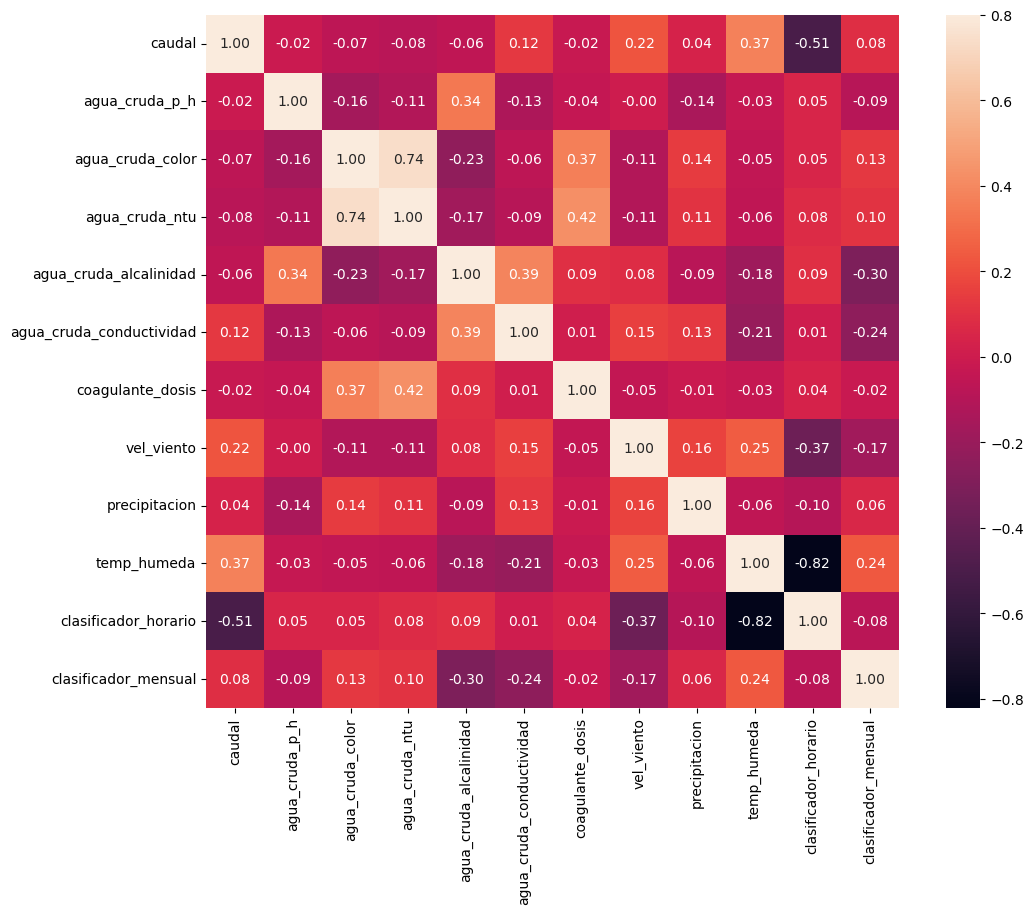

In [6]:
correlation(df_edit)

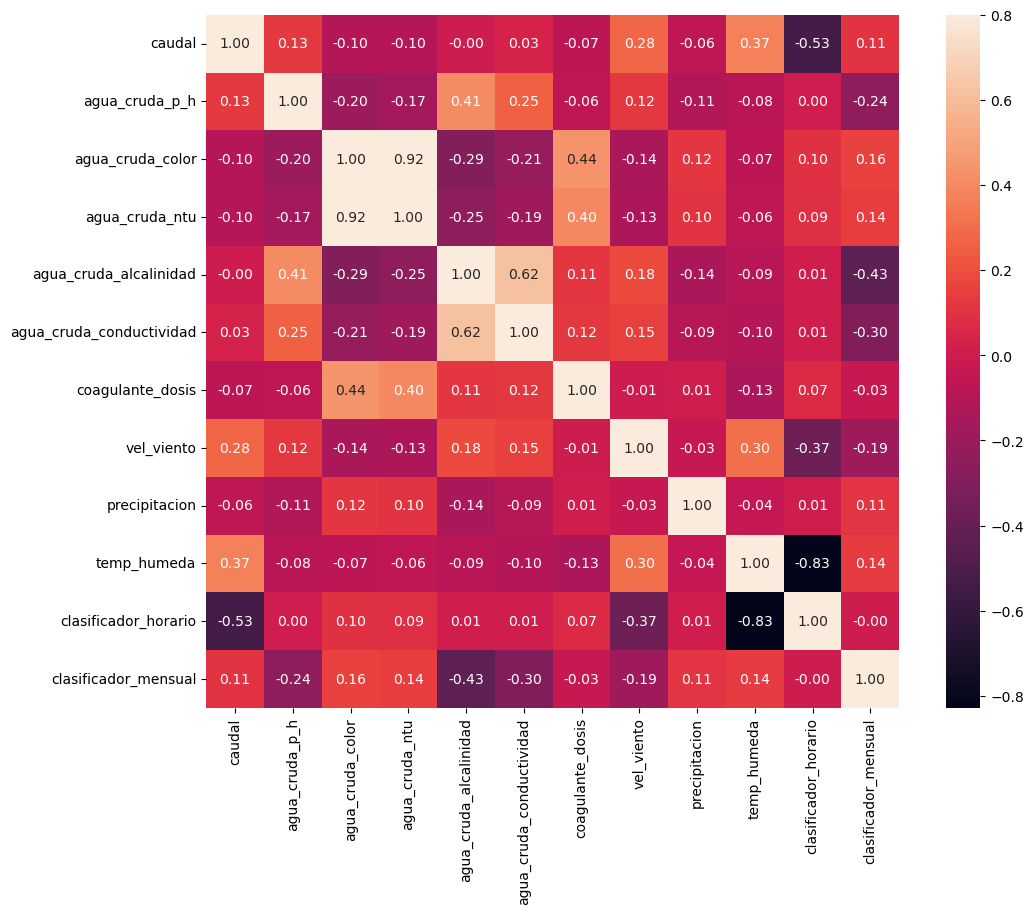

In [7]:
correlation(df_2017)

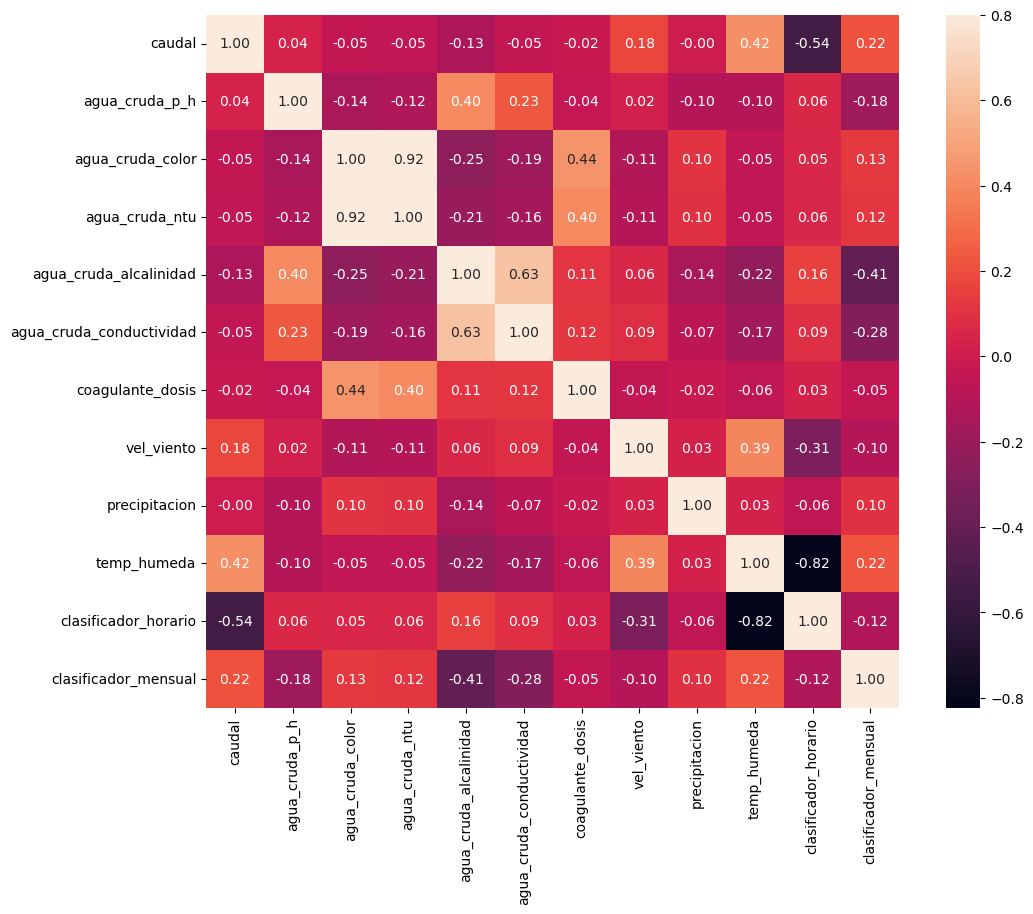

In [8]:
correlation(df_edit_2017)

Observando las correlaciones obtenidas, se ha decidido efectuar algunas modificaciones en nuestros conjuntos de datos. En lo que respecta a los conjuntos de datos completos, se tomará la acción de eliminar las variables 'agua_cruda_color' y 'clasificador_horario'. En relación a los conjuntos de datos que contienen información a partir del año 2017, se procederá a suprimir las variables 'agua_cruda_ntu' y 'clasificador_horario'. Este procedimiento se lleva a cabo con el objetivo de mitigar el efecto de la multicolinealidad en nuestro análisis.

In [9]:
df = df.drop(['agua_cruda_color', 'clasificador_horario'], axis=1)
df_edit = df_edit.drop(['agua_cruda_color', 'clasificador_horario'], axis=1)
df_2017 = df_2017.drop(['agua_cruda_ntu', 'clasificador_horario'], axis=1)
df_edit_2017 = df_edit_2017.drop(['agua_cruda_ntu', 'clasificador_horario'], axis=1)

## Creación de dataframe con dosis de coagulante categórica

In [10]:
def dosage_category(df):
    df = df.copy()
    df['coagulante_dosis'] = df['coagulante_dosis'].astype(float)
    conditions = [
        (df['coagulante_dosis'].between(15, 19.99)),
        (df['coagulante_dosis'].between(20, 24.99)),
        (df['coagulante_dosis'].between(25, 29.99)),
        (df['coagulante_dosis'].between(30, 34.99)),
        (df['coagulante_dosis'].between(35, 39.99)),
        (df['coagulante_dosis'].between(40, 44.99)),
        (df['coagulante_dosis'].between(45, 49.99)),
        (df['coagulante_dosis'].between(50, 99.99))
    ]
    
    values = ['quince', 'veinte', 'veinticinco', 'treinta', 'treinta y cinco', 'cuarenta','cuarenta y cinco','cincuenta']
    
    df['dosis_coagulante'] = np.select(conditions, values, default='no_definido')
    
    return df

In [11]:
df_category = dosage_category(df)
df_edit_category = dosage_category(df_edit)
df_2017_category = dosage_category(df_2017)
df_edit_2017_category = dosage_category(df_edit_2017)
df_category = df_category.drop('coagulante_dosis', axis=1)
df_edit_category = df_edit_category.drop('coagulante_dosis', axis=1)
df_2017_category = df_2017_category.drop('coagulante_dosis', axis=1)
df_edit_2017_category = df_edit_2017_category.drop('coagulante_dosis', axis=1)
df_category['dosis_coagulante'] = df_category['dosis_coagulante'].astype('category')
df_edit_category['dosis_coagulante'] = df_edit_category['dosis_coagulante'].astype('category')
df_2017_category['dosis_coagulante'] = df_2017_category['dosis_coagulante'].astype('category')
df_edit_2017_category['dosis_coagulante'] = df_edit_2017_category['dosis_coagulante'].astype('category')

In [107]:
def histogram(df, name):
    # Orden específico de las categorías
    orden = ['quince', 'veinte', 'veinticinco', 'treinta', 'treinta y cinco', 'cuarenta', 'cuarenta y cinco', 'cincuenta']
    
    plt.figure(figsize=(10,6))
    # Crear el histograma
    df['dosis_coagulante'].value_counts().reindex(orden).plot(kind='bar')

    # Personalizar el gráfico
    plt.title(f'Cantidad de datos para cada categoría de dosis de coagulante de la\n{name}')
    plt.xlabel('Categorías')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)  # Rota las etiquetas del eje x si es necesario

    # Mostrar el gráfico
    plt.show()

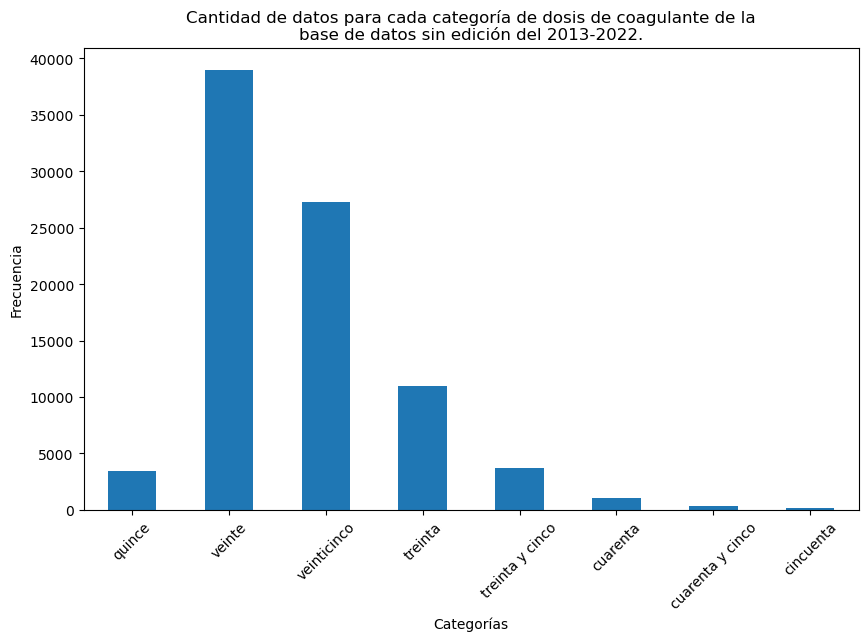

In [108]:
histogram(df_category, 'base de datos sin edición del 2013-2022.')

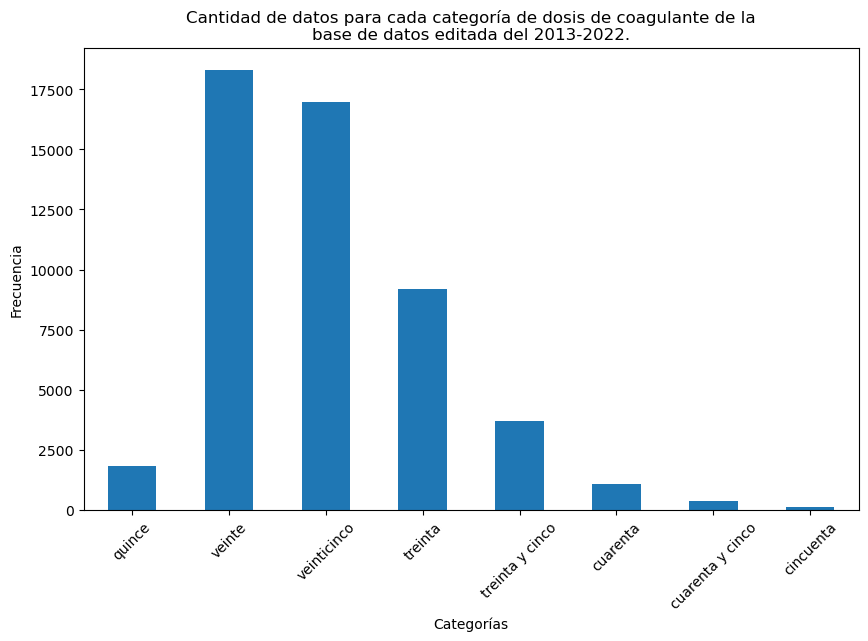

In [109]:
histogram(df_edit_category, 'base de datos editada del 2013-2022.')

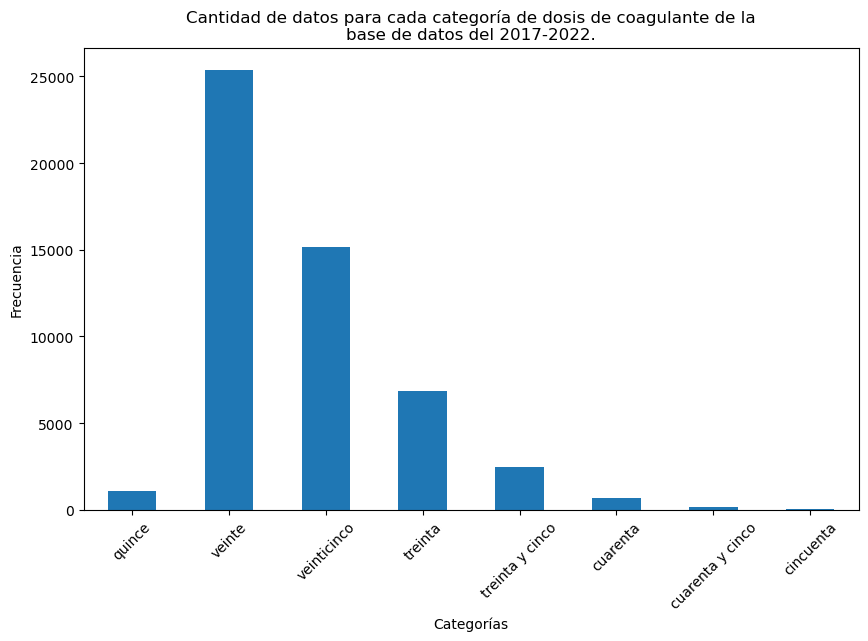

In [110]:
histogram(df_2017_category, 'base de datos del 2017-2022.')

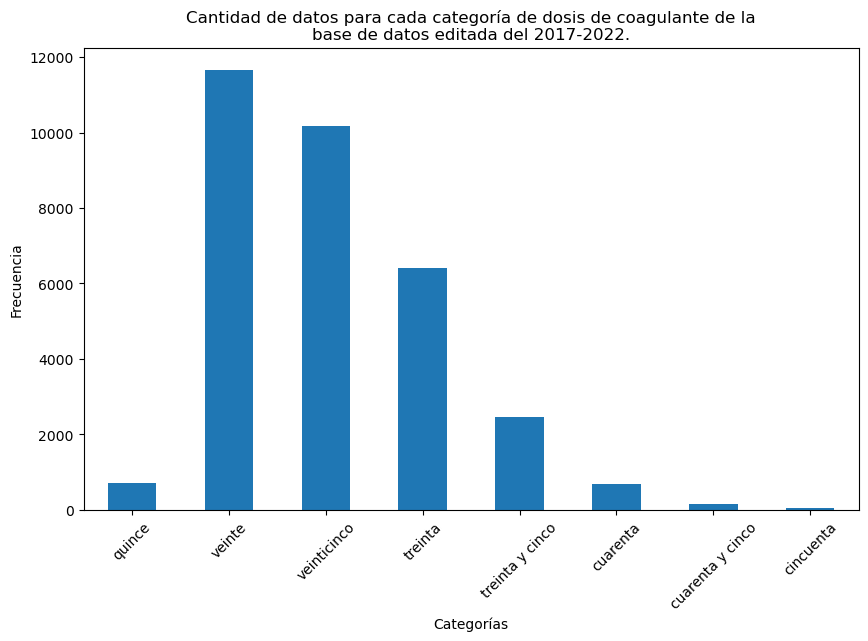

In [111]:
histogram(df_edit_2017_category, 'base de datos editada del 2017-2022.')

Por el momento, disponemos de ocho dataframes que serán la base para nuestro análisis. Cada conjunto de datos será sujeto a un examen meticuloso, ya que las decisiones que tomaremos estarán intrínsecamente vinculadas a las características específicas de cada dataframe.

In [16]:
def run_analysis(dataframes, target_col='dosis_coagulante'):
    for i, df in enumerate(dataframes):
        print(f"Trabajando con el dataframe número {i+1}")
        
        # Preparar datos
        y = df[target_col]
        X = df.drop(target_col, axis=1)
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

        # Ejecutar modelo sin balanceo
        print("Ejecutando modelo sin balanceo")
        model = run_model(X_train, X_test, y_train, y_test)
        print ("Distribution {}".format(Counter(y_train)))
        pred_y = model.predict(X_test)
        mostrar_resultados(y_test, pred_y)

        # Ejecutar modelo con balanceo
        print("Ejecutando modelo con balanceo")
        model = run_model_balanced(X_train, X_test, y_train, y_test)
        pred_y = model.predict(X_test)
        mostrar_resultados(y_test, pred_y)

        # Ejecutar modelo con undersampling NearMiss
        print("Ejecutando modelo con undersampling NearMiss")
        us = NearMiss(sampling_strategy='auto', n_neighbors=3, version=2)
        X_train_res, y_train_res = us.fit_resample(X_train, y_train)
        model = run_model(X_train_res, X_test, y_train_res, y_test)
        pred_y = model.predict(X_test)
        mostrar_resultados(y_test, pred_y)
        
        # Obtener la muestra más grande
        count_class = Counter(y_train)
        max_sample = max(count_class.values())

        # Determinar el decremento basado en el tamaño de la muestra más grande
        decrement = 0
        if max_sample > 20000:
            decrement = 3000
        elif max_sample <= 20000 and max_sample > 15000:
            decrement = 1500
        else:
            decrement = 1000

        # Ejecutando modelo con SMOTETomek
        print("Ejecutando modelo con SMOTETomek")
        
        # Crear estrategia de muestreo
        sampling_strategy = {}
        decrement_multiplier = 0
        for class_label in sorted(count_class, key=count_class.get, reverse=True):
            sample_value = max_sample - decrement_multiplier*decrement
            # Asegurarse de que el valor de muestreo no sea menor que el conteo de clases original
            sampling_strategy[class_label] = max(sample_value, count_class[class_label])
            decrement_multiplier += 1

        os_us = SMOTETomek(sampling_strategy=sampling_strategy)
        X_train_res, y_train_res = os_us.fit_resample(X_train, y_train)

        print ("Distribution before resampling {}".format(Counter(y_train)))
        print ("Distribution after resampling {}".format(Counter(y_train_res)))

        model = run_model(X_train_res, X_test, y_train_res, y_test)
        pred_y = model.predict(X_test)
        mostrar_resultados(y_test, pred_y)

        # Ejecutar modelo con SMOTE
        print("Ejecutando modelo con SMOTE")
        sm = SMOTE(sampling_strategy='auto', k_neighbors=3, random_state=1)
        X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
        print ("Distribution before resampling {}".format(Counter(y_train)))
        print ("Distribution after resampling {}".format(Counter(y_train_res)))
        model = run_model(X_train_res, X_test, y_train_res, y_test)
        pred_y = model.predict(X_test)
        mostrar_resultados(y_test, pred_y)

        # Ejecutar modelo con Balanced Bagging Classifier
        print("Ejecutando modelo con Balanced Bagging Classifier")
        bbc = BalancedBaggingClassifier(base_estimator=LogisticRegression(),
                                        sampling_strategy='auto',
                                        replacement=False,
                                        random_state=0)
        bbc.fit(X_train, y_train)
        pred_y = bbc.predict(X_test)
        mostrar_resultados(y_test, pred_y)

def run_model(X_train, X_test, y_train, y_test):
    clf_base = LogisticRegression()
    clf_base.fit(X_train, y_train)
    return clf_base

def run_model_balanced(X_train, X_test, y_train, y_test):
    clf = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg",class_weight="balanced")
    clf.fit(X_train, y_train)
    return clf

def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    LABELS = np.unique(y_test) # Aquí cambiamos 'y' por 'y_test'
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))

Trabajando con el dataframe número 1
Ejecutando modelo sin balanceo


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Distribution Counter({'veinte': 27371, 'veinticinco': 19069, 'treinta': 7728, 'treinta y cinco': 2594, 'quince': 2399, 'cuarenta': 742, 'cuarenta y cinco': 237, 'cincuenta': 94})


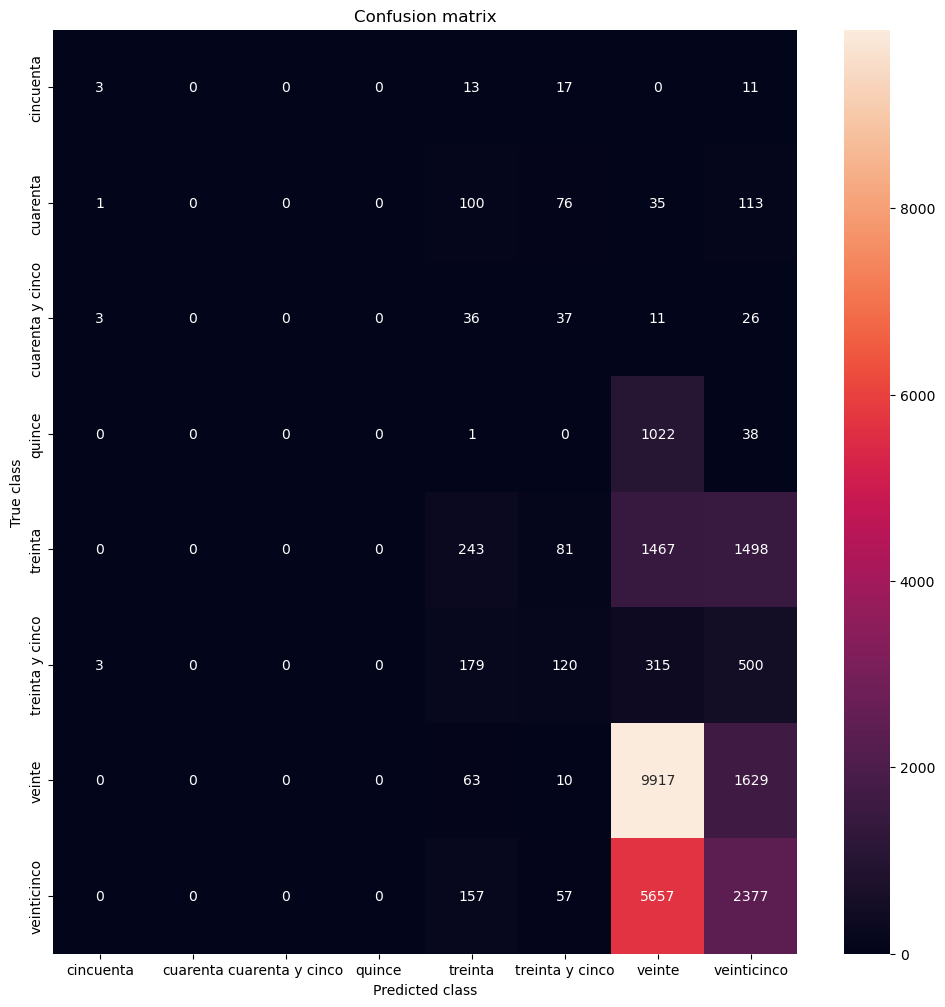

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                  precision    recall  f1-score   support

       cincuenta       0.30      0.07      0.11        44
        cuarenta       0.00      0.00      0.00       325
cuarenta y cinco       0.00      0.00      0.00       113
          quince       0.00      0.00      0.00      1061
         treinta       0.31      0.07      0.12      3289
 treinta y cinco       0.30      0.11      0.16      1117
          veinte       0.54      0.85      0.66     11619
     veinticinco       0.38      0.29      0.33      8248

        accuracy                           0.49     25816
       macro avg       0.23      0.17      0.17     25816
    weighted avg       0.42      0.49      0.42     25816

Ejecutando modelo con balanceo


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


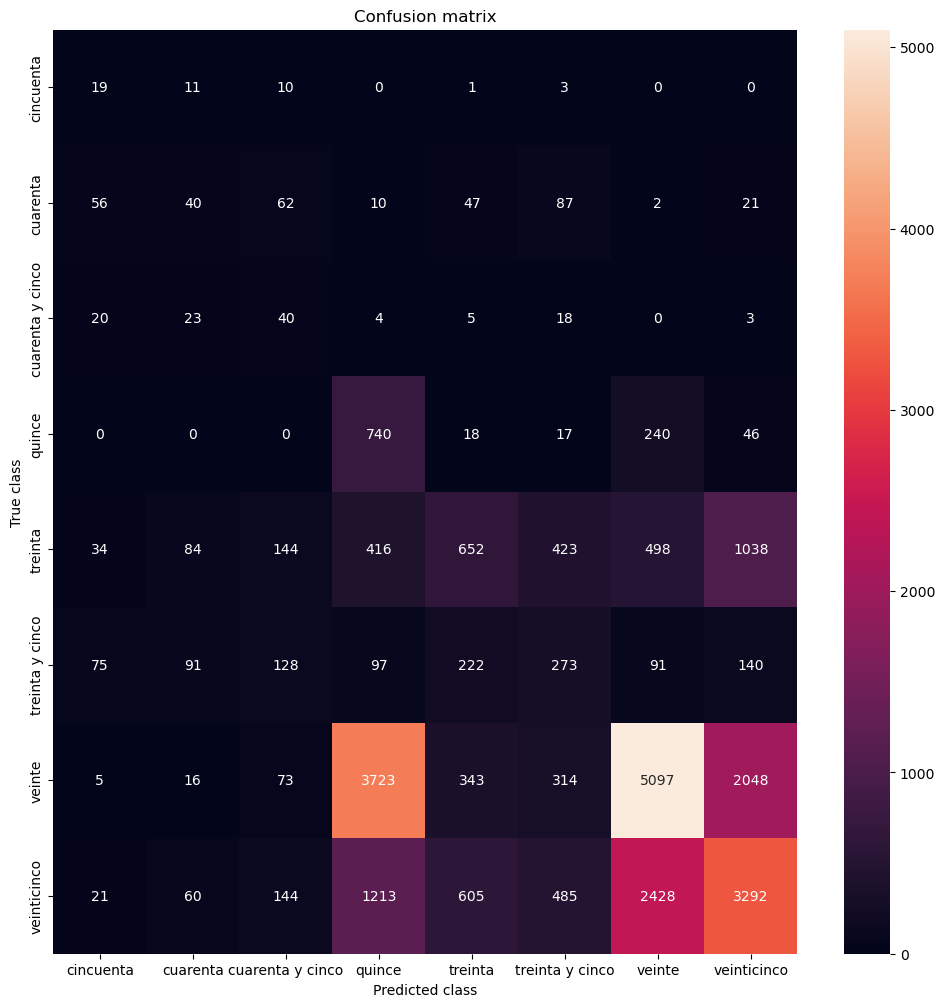

                  precision    recall  f1-score   support

       cincuenta       0.08      0.43      0.14        44
        cuarenta       0.12      0.12      0.12       325
cuarenta y cinco       0.07      0.35      0.11       113
          quince       0.12      0.70      0.20      1061
         treinta       0.34      0.20      0.25      3289
 treinta y cinco       0.17      0.24      0.20      1117
          veinte       0.61      0.44      0.51     11619
     veinticinco       0.50      0.40      0.44      8248

        accuracy                           0.39     25816
       macro avg       0.25      0.36      0.25     25816
    weighted avg       0.49      0.39      0.42     25816

Ejecutando modelo con undersampling NearMiss


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


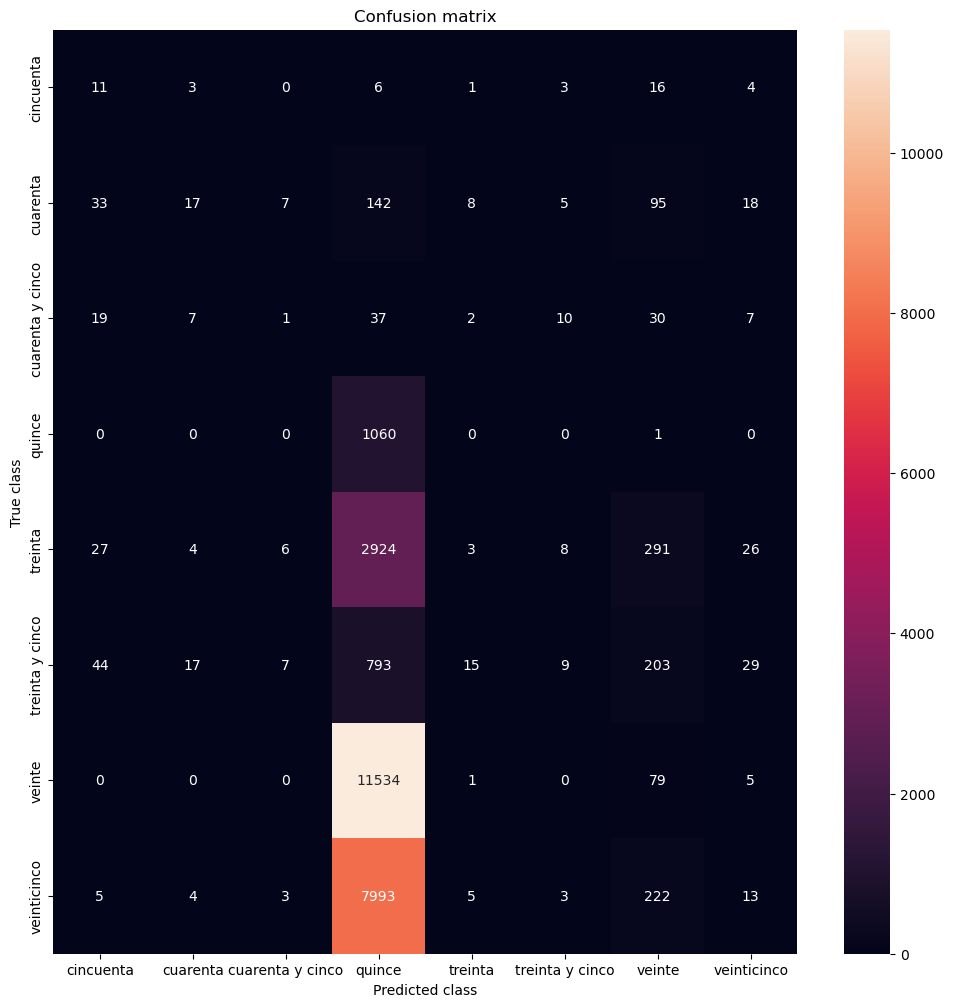

                  precision    recall  f1-score   support

       cincuenta       0.08      0.25      0.12        44
        cuarenta       0.33      0.05      0.09       325
cuarenta y cinco       0.04      0.01      0.01       113
          quince       0.04      1.00      0.08      1061
         treinta       0.09      0.00      0.00      3289
 treinta y cinco       0.24      0.01      0.02      1117
          veinte       0.08      0.01      0.01     11619
     veinticinco       0.13      0.00      0.00      8248

        accuracy                           0.05     25816
       macro avg       0.13      0.17      0.04     25816
    weighted avg       0.11      0.05      0.01     25816

Ejecutando modelo con SMOTETomek
Distribution before resampling Counter({'veinte': 27371, 'veinticinco': 19069, 'treinta': 7728, 'treinta y cinco': 2594, 'quince': 2399, 'cuarenta': 742, 'cuarenta y cinco': 237, 'cincuenta': 94})
Distribution after resampling Counter({'veinte': 25620, 'veinticinco': 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


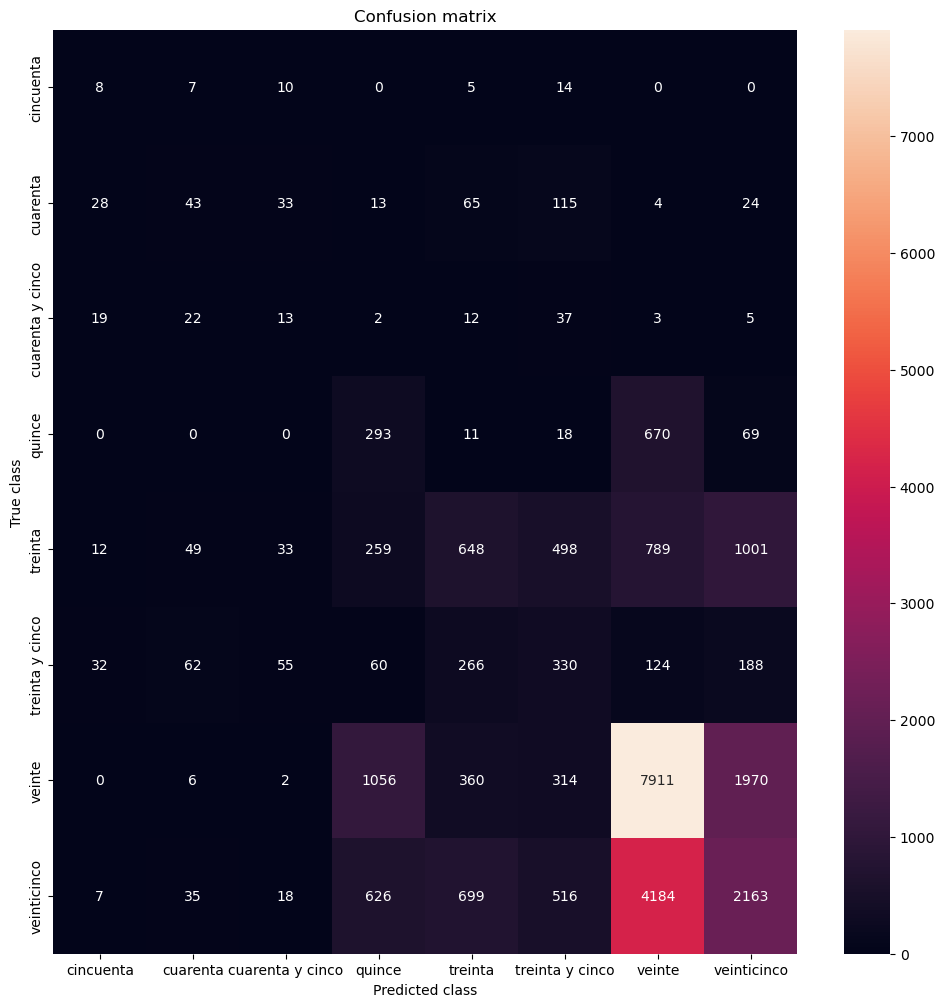

                  precision    recall  f1-score   support

       cincuenta       0.08      0.18      0.11        44
        cuarenta       0.19      0.13      0.16       325
cuarenta y cinco       0.08      0.12      0.09       113
          quince       0.13      0.28      0.17      1061
         treinta       0.31      0.20      0.24      3289
 treinta y cinco       0.18      0.30      0.22      1117
          veinte       0.58      0.68      0.63     11619
     veinticinco       0.40      0.26      0.32      8248

        accuracy                           0.44     25816
       macro avg       0.24      0.27      0.24     25816
    weighted avg       0.44      0.44      0.43     25816

Ejecutando modelo con SMOTE
Distribution before resampling Counter({'veinte': 27371, 'veinticinco': 19069, 'treinta': 7728, 'treinta y cinco': 2594, 'quince': 2399, 'cuarenta': 742, 'cuarenta y cinco': 237, 'cincuenta': 94})
Distribution after resampling Counter({'treinta': 27371, 'veinte': 27371, 'v

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


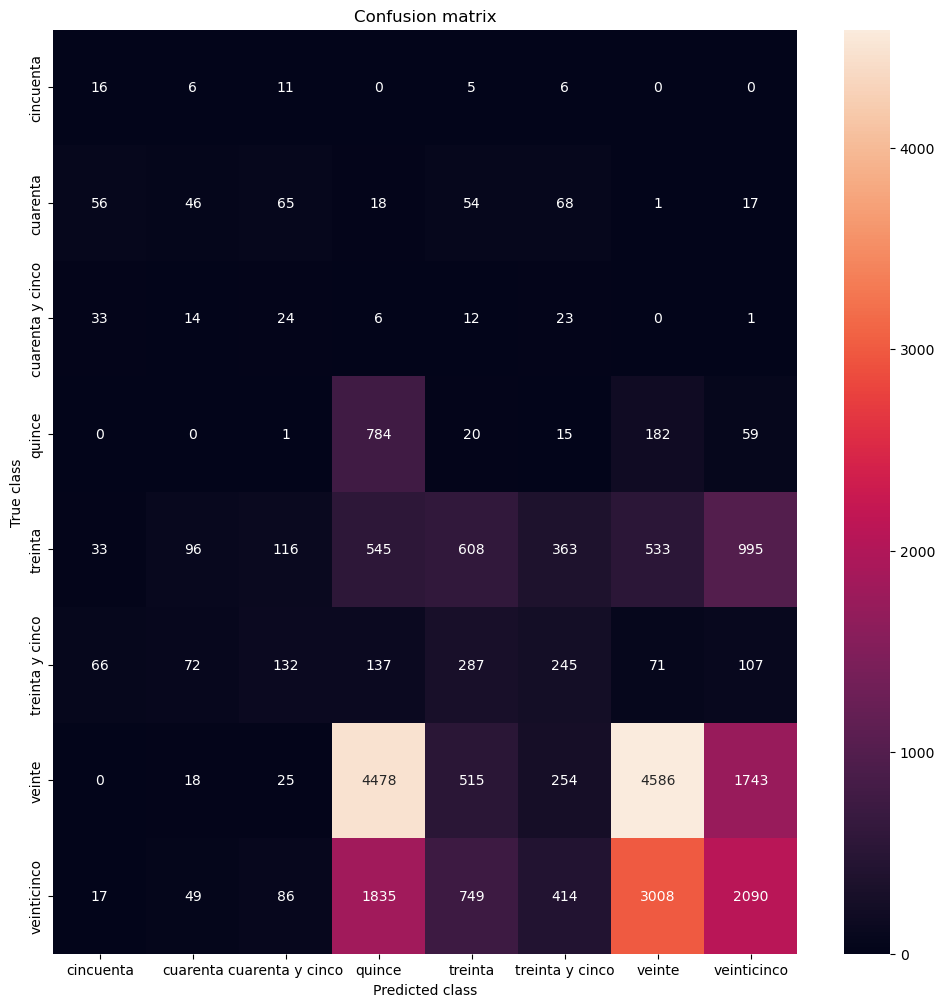

                  precision    recall  f1-score   support

       cincuenta       0.07      0.36      0.12        44
        cuarenta       0.15      0.14      0.15       325
cuarenta y cinco       0.05      0.21      0.08       113
          quince       0.10      0.74      0.18      1061
         treinta       0.27      0.18      0.22      3289
 treinta y cinco       0.18      0.22      0.20      1117
          veinte       0.55      0.39      0.46     11619
     veinticinco       0.42      0.25      0.32      8248

        accuracy                           0.33     25816
       macro avg       0.22      0.31      0.21     25816
    weighted avg       0.43      0.33      0.35     25816

Ejecutando modelo con Balanced Bagging Classifier


C:\Users\ASUS\anaconda3\lib\site-packages\imblearn\ensemble\_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/

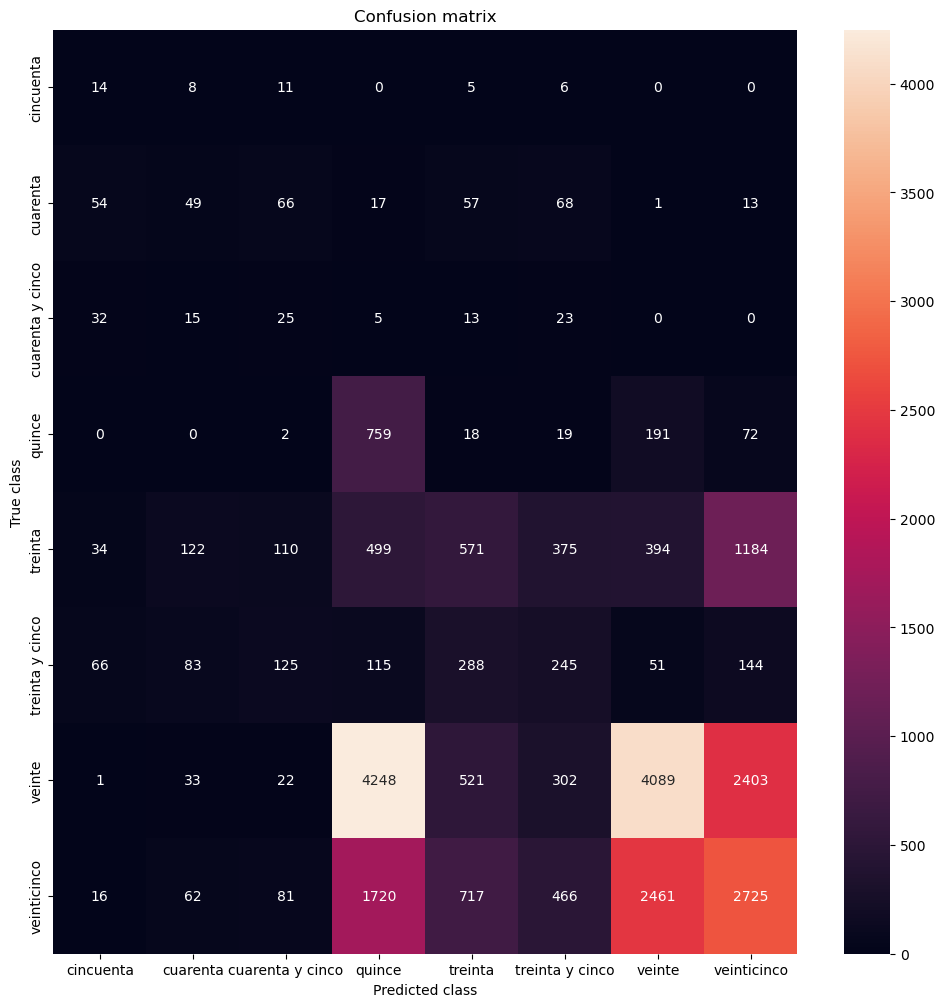

                  precision    recall  f1-score   support

       cincuenta       0.06      0.32      0.11        44
        cuarenta       0.13      0.15      0.14       325
cuarenta y cinco       0.06      0.22      0.09       113
          quince       0.10      0.72      0.18      1061
         treinta       0.26      0.17      0.21      3289
 treinta y cinco       0.16      0.22      0.19      1117
          veinte       0.57      0.35      0.43     11619
     veinticinco       0.42      0.33      0.37      8248

        accuracy                           0.33     25816
       macro avg       0.22      0.31      0.21     25816
    weighted avg       0.44      0.33      0.36     25816

Trabajando con el dataframe número 2
Ejecutando modelo sin balanceo


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Distribution Counter({'veinte': 12803, 'veinticinco': 11843, 'treinta': 6448, 'treinta y cinco': 2600, 'quince': 1313, 'cuarenta': 759, 'cuarenta y cinco': 239, 'cincuenta': 96})


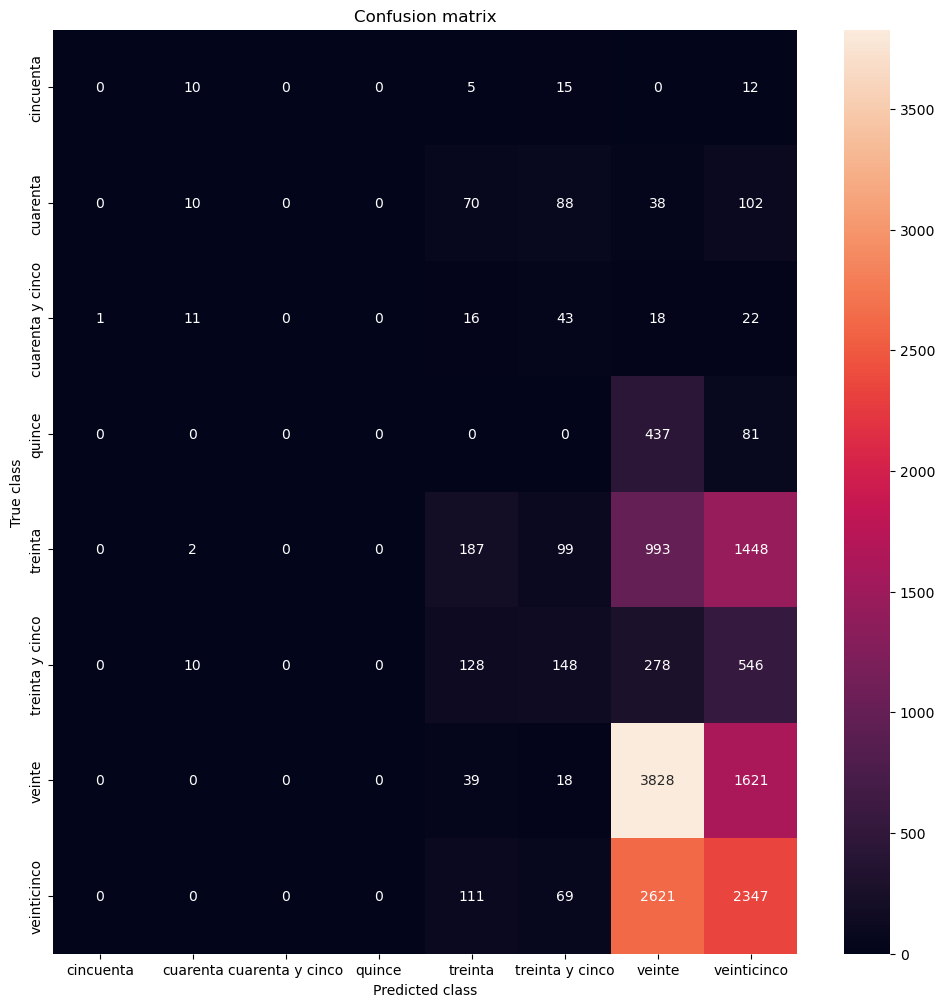

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                  precision    recall  f1-score   support

       cincuenta       0.00      0.00      0.00        42
        cuarenta       0.23      0.03      0.06       308
cuarenta y cinco       0.00      0.00      0.00       111
          quince       0.00      0.00      0.00       518
         treinta       0.34      0.07      0.11      2729
 treinta y cinco       0.31      0.13      0.19      1110
          veinte       0.47      0.70      0.56      5506
     veinticinco       0.38      0.46      0.41      5148

        accuracy                           0.42     15472
       macro avg       0.22      0.17      0.17     15472
    weighted avg       0.38      0.42      0.37     15472

Ejecutando modelo con balanceo


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


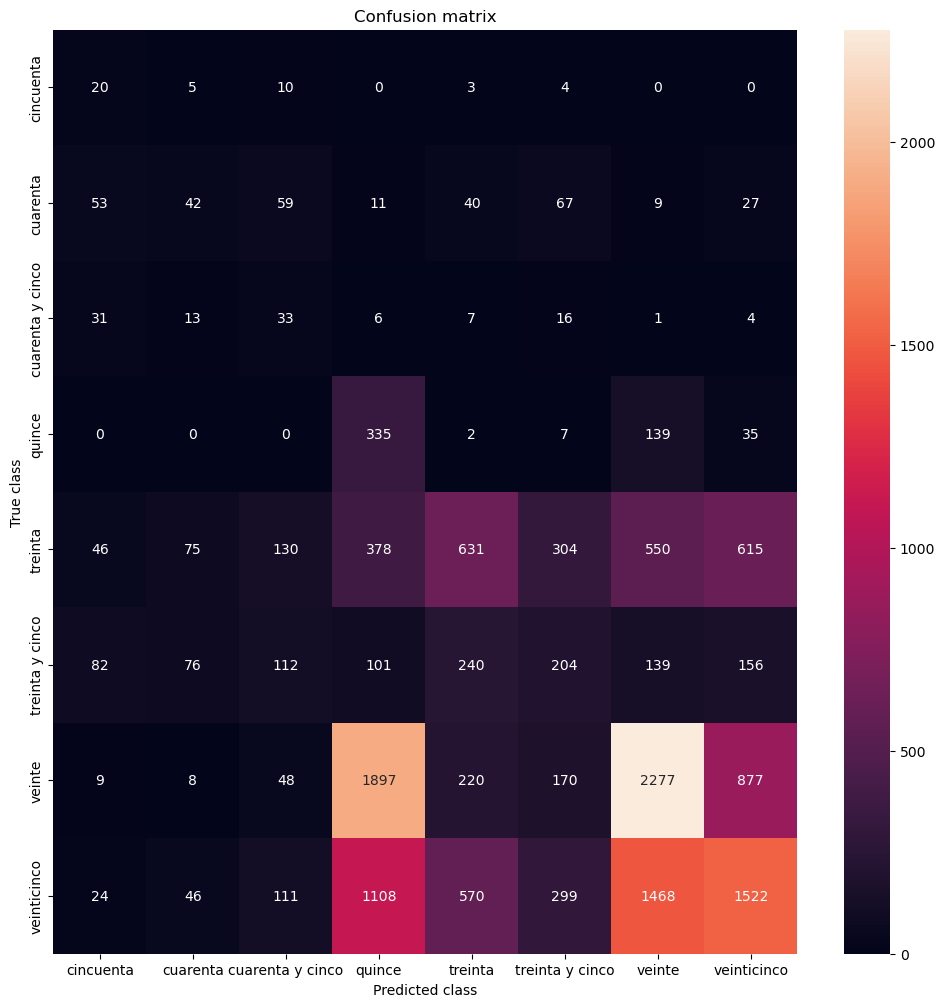

                  precision    recall  f1-score   support

       cincuenta       0.08      0.48      0.13        42
        cuarenta       0.16      0.14      0.15       308
cuarenta y cinco       0.07      0.30      0.11       111
          quince       0.09      0.65      0.15       518
         treinta       0.37      0.23      0.28      2729
 treinta y cinco       0.19      0.18      0.19      1110
          veinte       0.50      0.41      0.45      5506
     veinticinco       0.47      0.30      0.36      5148

        accuracy                           0.33     15472
       macro avg       0.24      0.34      0.23     15472
    weighted avg       0.42      0.33      0.35     15472

Ejecutando modelo con undersampling NearMiss


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


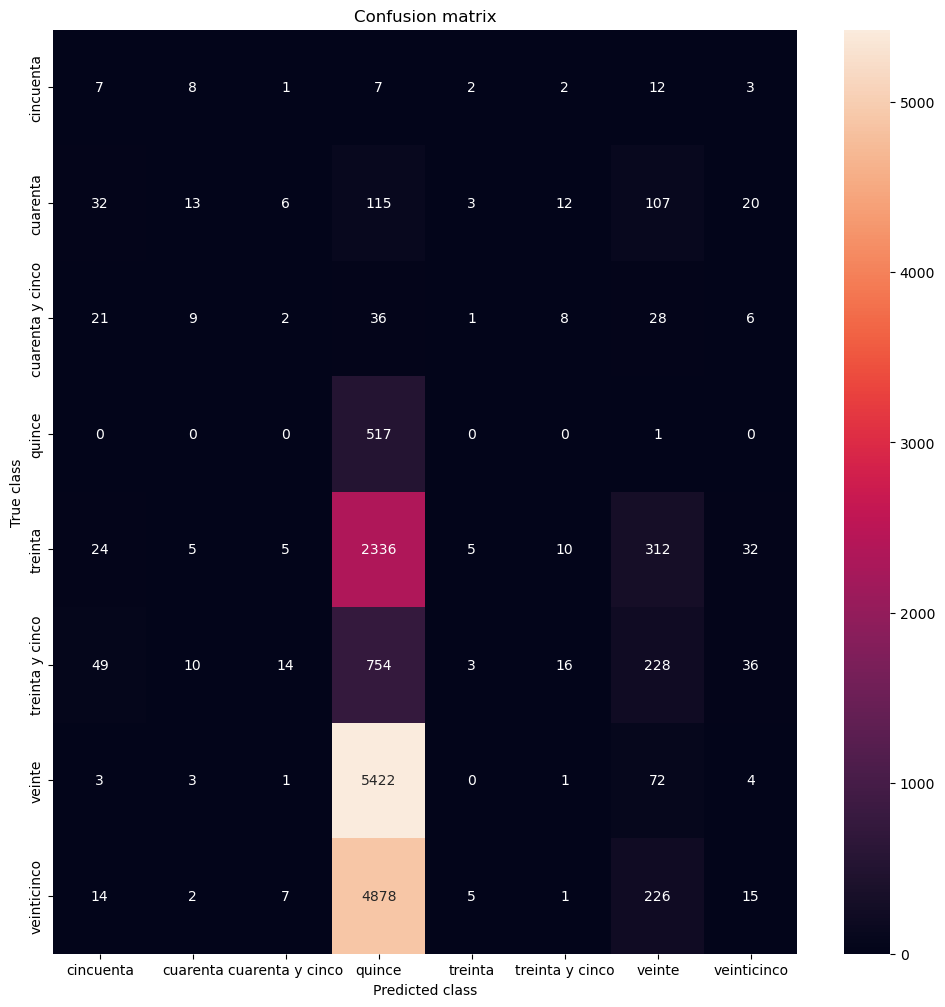

                  precision    recall  f1-score   support

       cincuenta       0.05      0.17      0.07        42
        cuarenta       0.26      0.04      0.07       308
cuarenta y cinco       0.06      0.02      0.03       111
          quince       0.04      1.00      0.07       518
         treinta       0.26      0.00      0.00      2729
 treinta y cinco       0.32      0.01      0.03      1110
          veinte       0.07      0.01      0.02      5506
     veinticinco       0.13      0.00      0.01      5148

        accuracy                           0.04     15472
       macro avg       0.15      0.16      0.04     15472
    weighted avg       0.15      0.04      0.02     15472

Ejecutando modelo con SMOTETomek
Distribution before resampling Counter({'veinte': 12803, 'veinticinco': 11843, 'treinta': 6448, 'treinta y cinco': 2600, 'quince': 1313, 'cuarenta': 759, 'cuarenta y cinco': 239, 'cincuenta': 96})
Distribution after resampling Counter({'veinte': 11315, 'veinticinco': 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


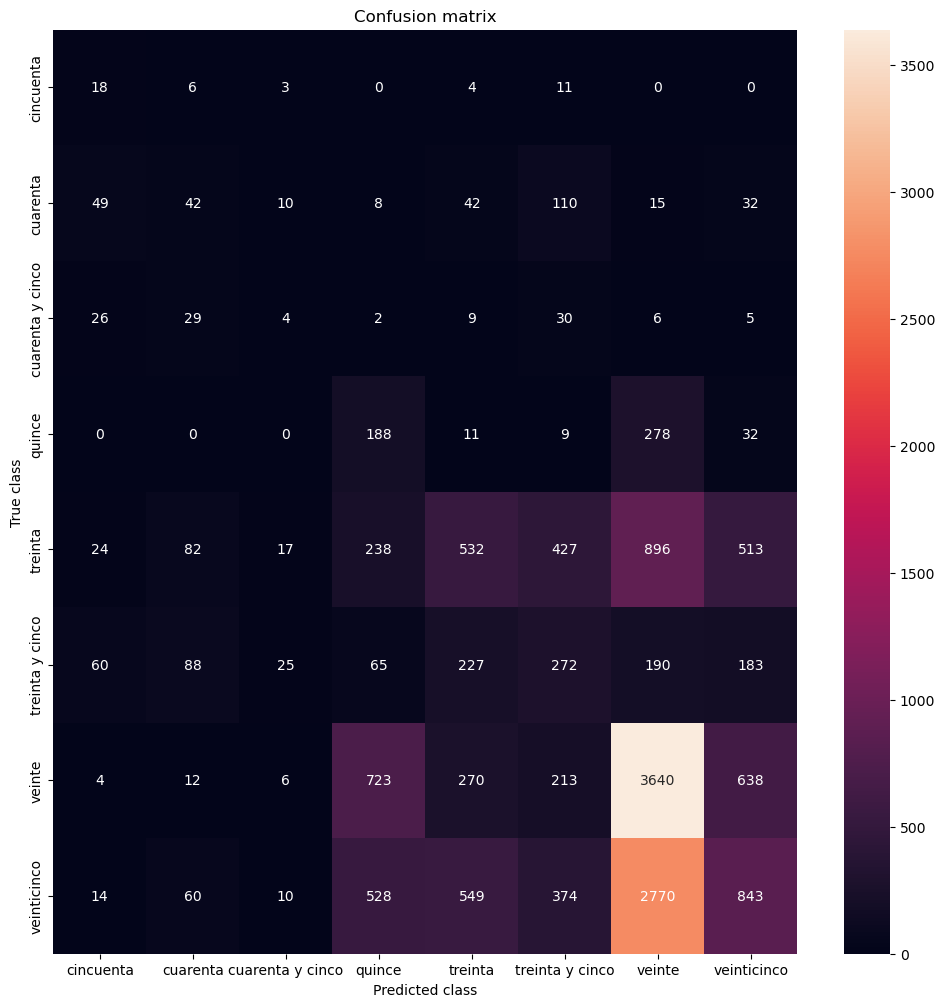

                  precision    recall  f1-score   support

       cincuenta       0.09      0.43      0.15        42
        cuarenta       0.13      0.14      0.13       308
cuarenta y cinco       0.05      0.04      0.04       111
          quince       0.11      0.36      0.17       518
         treinta       0.32      0.19      0.24      2729
 treinta y cinco       0.19      0.25      0.21      1110
          veinte       0.47      0.66      0.55      5506
     veinticinco       0.38      0.16      0.23      5148

        accuracy                           0.36     15472
       macro avg       0.22      0.28      0.22     15472
    weighted avg       0.37      0.36      0.34     15472

Ejecutando modelo con SMOTE
Distribution before resampling Counter({'veinte': 12803, 'veinticinco': 11843, 'treinta': 6448, 'treinta y cinco': 2600, 'quince': 1313, 'cuarenta': 759, 'cuarenta y cinco': 239, 'cincuenta': 96})
Distribution after resampling Counter({'treinta': 12803, 'veinticinco': 1280

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


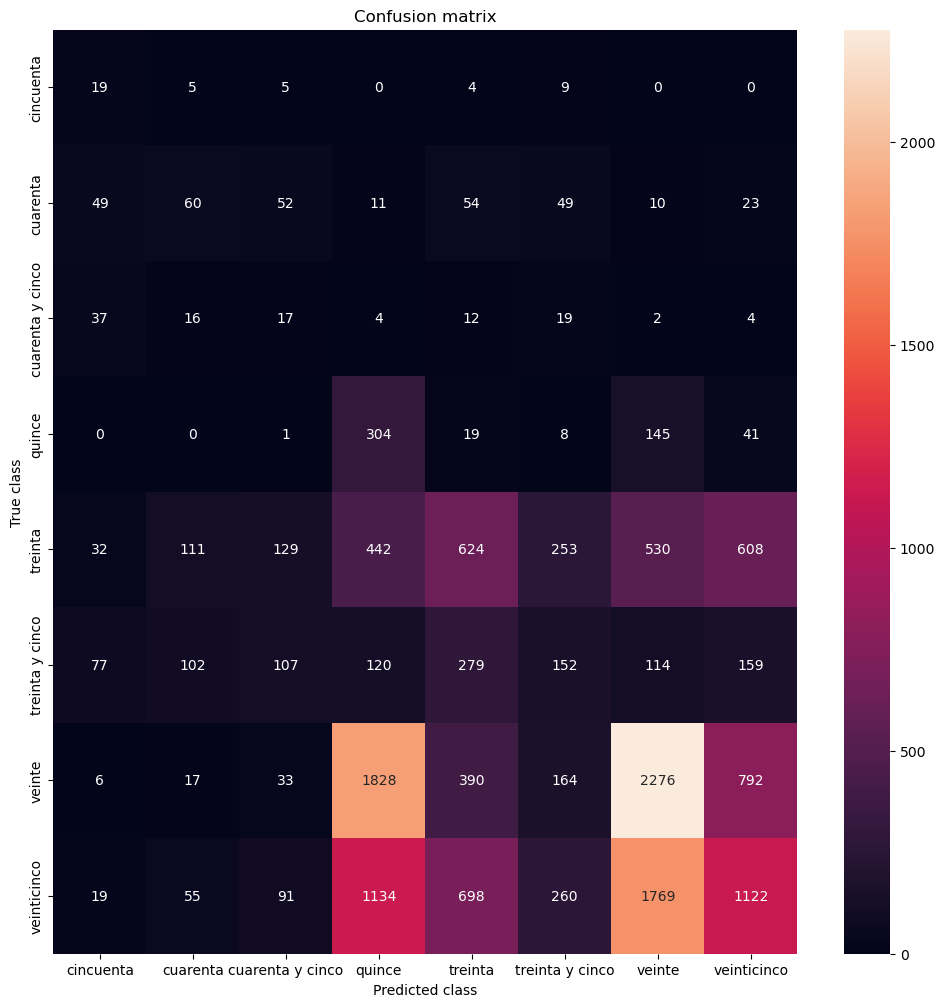

                  precision    recall  f1-score   support

       cincuenta       0.08      0.45      0.14        42
        cuarenta       0.16      0.19      0.18       308
cuarenta y cinco       0.04      0.15      0.06       111
          quince       0.08      0.59      0.14       518
         treinta       0.30      0.23      0.26      2729
 treinta y cinco       0.17      0.14      0.15      1110
          veinte       0.47      0.41      0.44      5506
     veinticinco       0.41      0.22      0.28      5148

        accuracy                           0.30     15472
       macro avg       0.21      0.30      0.21     15472
    weighted avg       0.37      0.30      0.32     15472

Ejecutando modelo con Balanced Bagging Classifier


C:\Users\ASUS\anaconda3\lib\site-packages\imblearn\ensemble\_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/

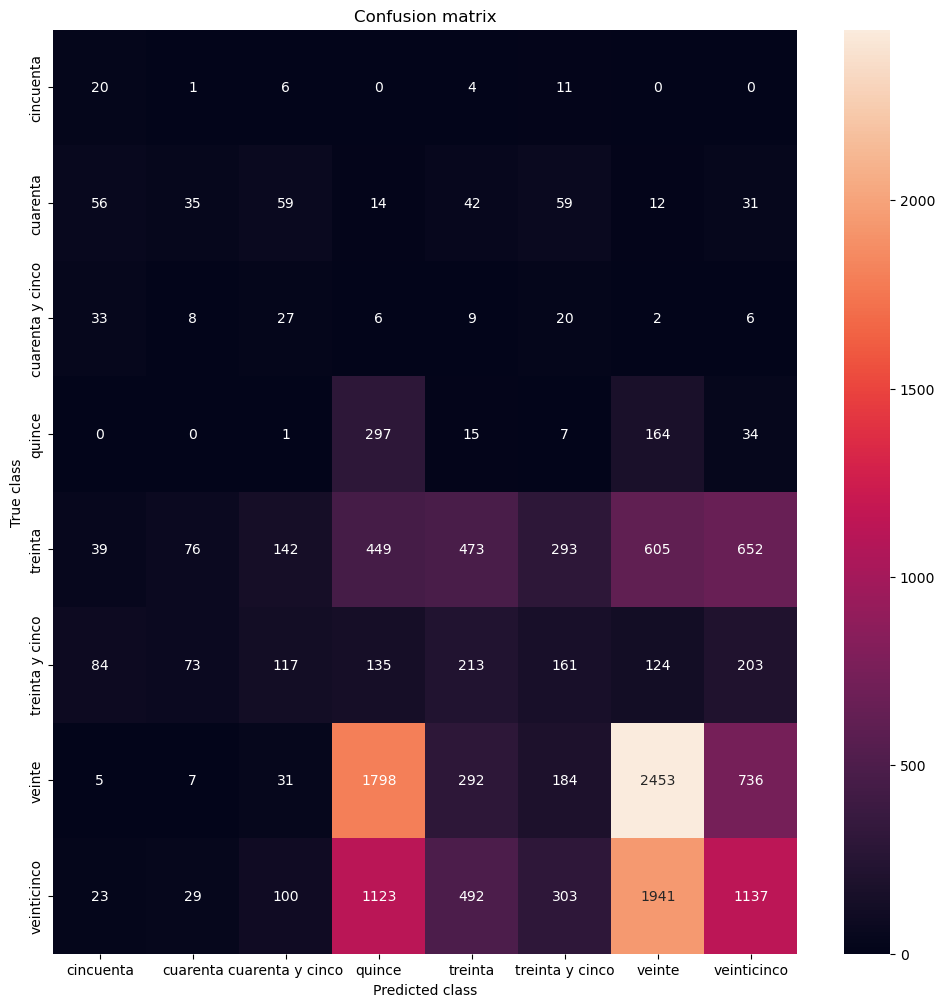

                  precision    recall  f1-score   support

       cincuenta       0.08      0.48      0.13        42
        cuarenta       0.15      0.11      0.13       308
cuarenta y cinco       0.06      0.24      0.09       111
          quince       0.08      0.57      0.14       518
         treinta       0.31      0.17      0.22      2729
 treinta y cinco       0.16      0.15      0.15      1110
          veinte       0.46      0.45      0.45      5506
     veinticinco       0.41      0.22      0.29      5148

        accuracy                           0.30     15472
       macro avg       0.21      0.30      0.20     15472
    weighted avg       0.37      0.30      0.31     15472

Trabajando con el dataframe número 3
Ejecutando modelo sin balanceo


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Distribution Counter({'veinte': 17779, 'veinticinco': 10610, 'treinta': 4767, 'treinta y cinco': 1725, 'quince': 781, 'cuarenta': 470, 'cuarenta y cinco': 96, 'cincuenta': 37})


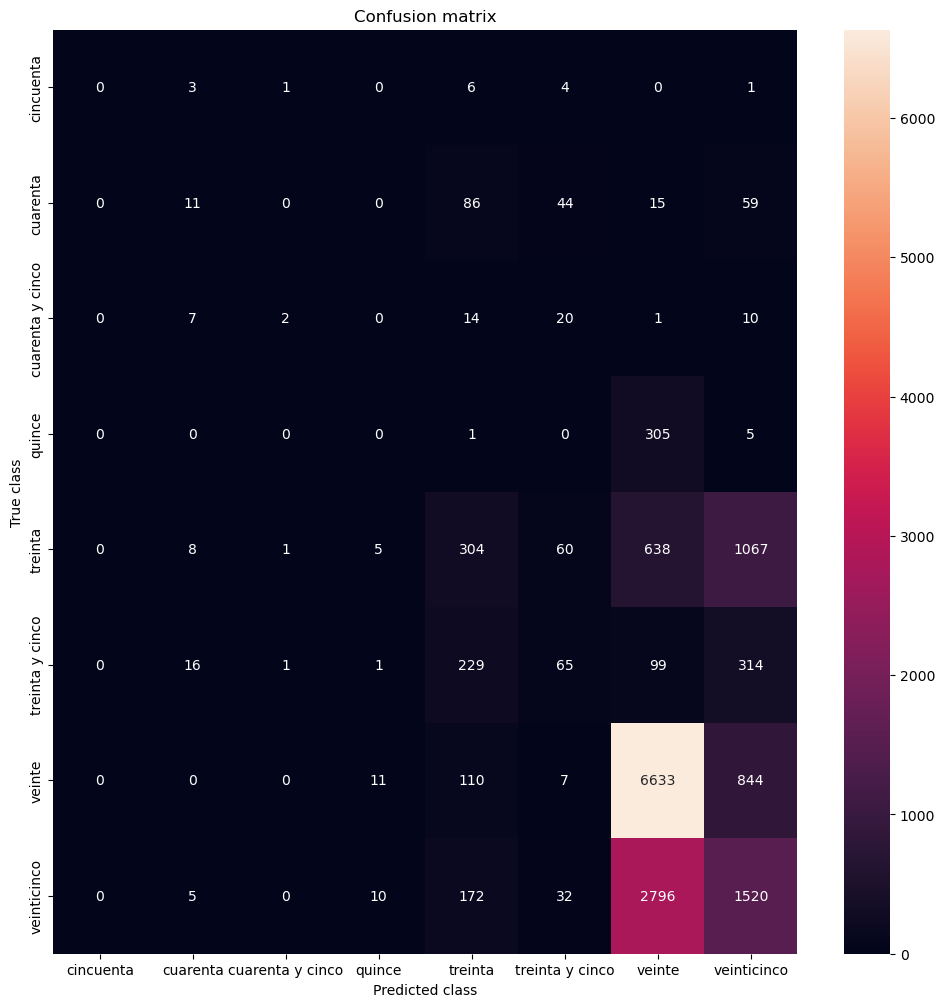

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                  precision    recall  f1-score   support

       cincuenta       0.00      0.00      0.00        15
        cuarenta       0.22      0.05      0.08       215
cuarenta y cinco       0.40      0.04      0.07        54
          quince       0.00      0.00      0.00       311
         treinta       0.33      0.15      0.20      2083
 treinta y cinco       0.28      0.09      0.14       725
          veinte       0.63      0.87      0.73      7605
     veinticinco       0.40      0.34      0.36      4535

        accuracy                           0.55     15543
       macro avg       0.28      0.19      0.20     15543
    weighted avg       0.49      0.55      0.50     15543

Ejecutando modelo con balanceo


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


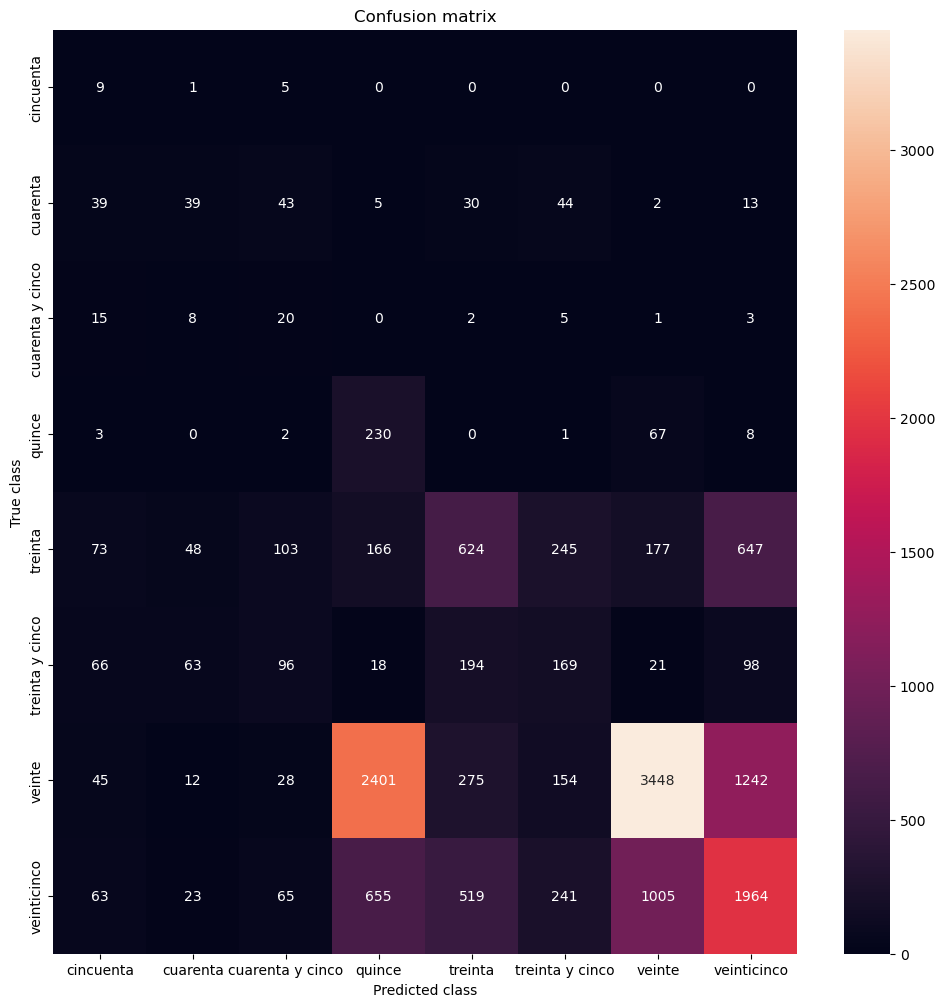

                  precision    recall  f1-score   support

       cincuenta       0.03      0.60      0.05        15
        cuarenta       0.20      0.18      0.19       215
cuarenta y cinco       0.06      0.37      0.10        54
          quince       0.07      0.74      0.12       311
         treinta       0.38      0.30      0.33      2083
 treinta y cinco       0.20      0.23      0.21       725
          veinte       0.73      0.45      0.56      7605
     veinticinco       0.49      0.43      0.46      4535

        accuracy                           0.42     15543
       macro avg       0.27      0.41      0.25     15543
    weighted avg       0.57      0.42      0.47     15543

Ejecutando modelo con undersampling NearMiss


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


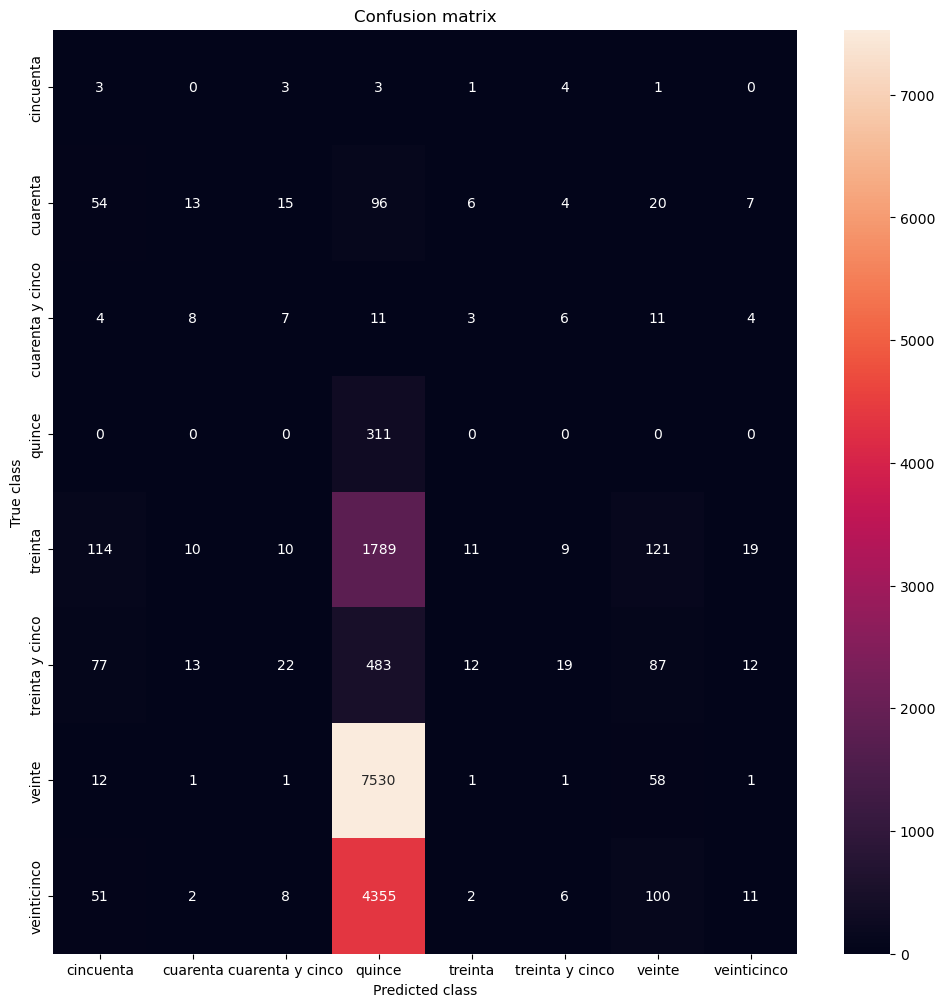

                  precision    recall  f1-score   support

       cincuenta       0.01      0.20      0.02        15
        cuarenta       0.28      0.06      0.10       215
cuarenta y cinco       0.11      0.13      0.12        54
          quince       0.02      1.00      0.04       311
         treinta       0.31      0.01      0.01      2083
 treinta y cinco       0.39      0.03      0.05       725
          veinte       0.15      0.01      0.01      7605
     veinticinco       0.20      0.00      0.00      4535

        accuracy                           0.03     15543
       macro avg       0.18      0.18      0.04     15543
    weighted avg       0.19      0.03      0.01     15543

Ejecutando modelo con SMOTETomek
Distribution before resampling Counter({'veinte': 17779, 'veinticinco': 10610, 'treinta': 4767, 'treinta y cinco': 1725, 'quince': 781, 'cuarenta': 470, 'cuarenta y cinco': 96, 'cincuenta': 37})
Distribution after resampling Counter({'veinte': 16921, 'veinticinco': 15

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


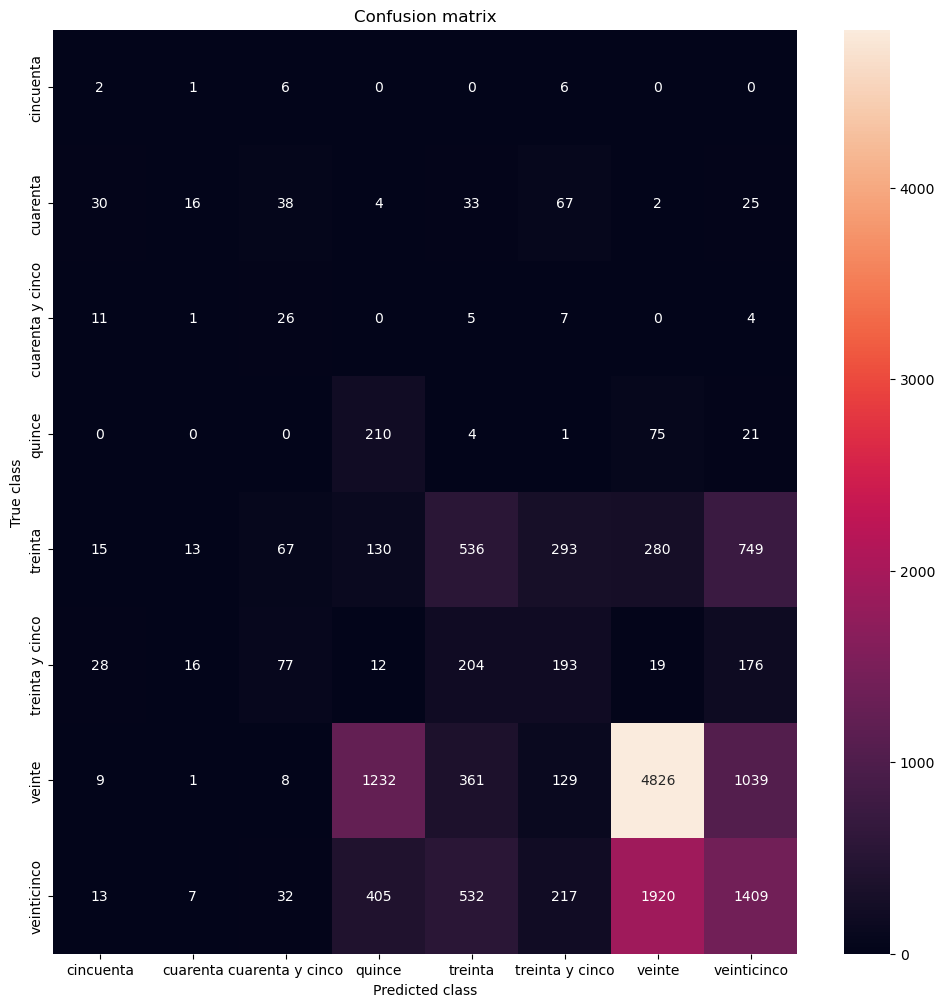

                  precision    recall  f1-score   support

       cincuenta       0.02      0.13      0.03        15
        cuarenta       0.29      0.07      0.12       215
cuarenta y cinco       0.10      0.48      0.17        54
          quince       0.11      0.68      0.18       311
         treinta       0.32      0.26      0.29      2083
 treinta y cinco       0.21      0.27      0.24       725
          veinte       0.68      0.63      0.66      7605
     veinticinco       0.41      0.31      0.35      4535

        accuracy                           0.46     15543
       macro avg       0.27      0.35      0.25     15543
    weighted avg       0.51      0.46      0.48     15543

Ejecutando modelo con SMOTE
Distribution before resampling Counter({'veinte': 17779, 'veinticinco': 10610, 'treinta': 4767, 'treinta y cinco': 1725, 'quince': 781, 'cuarenta': 470, 'cuarenta y cinco': 96, 'cincuenta': 37})
Distribution after resampling Counter({'veinticinco': 17779, 'veinte': 17779, 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


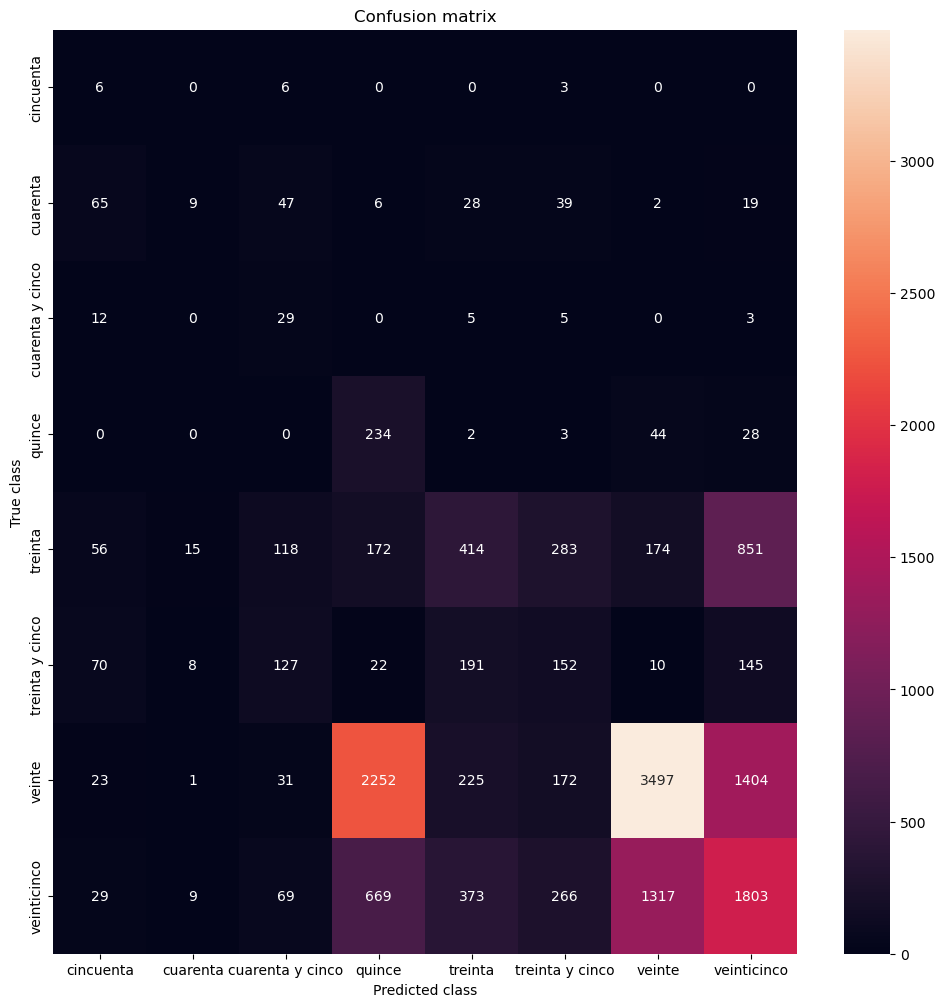

                  precision    recall  f1-score   support

       cincuenta       0.02      0.40      0.04        15
        cuarenta       0.21      0.04      0.07       215
cuarenta y cinco       0.07      0.54      0.12        54
          quince       0.07      0.75      0.13       311
         treinta       0.33      0.20      0.25      2083
 treinta y cinco       0.16      0.21      0.18       725
          veinte       0.69      0.46      0.55      7605
     veinticinco       0.42      0.40      0.41      4535

        accuracy                           0.40     15543
       macro avg       0.25      0.37      0.22     15543
    weighted avg       0.52      0.40      0.44     15543

Ejecutando modelo con Balanced Bagging Classifier


C:\Users\ASUS\anaconda3\lib\site-packages\imblearn\ensemble\_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/

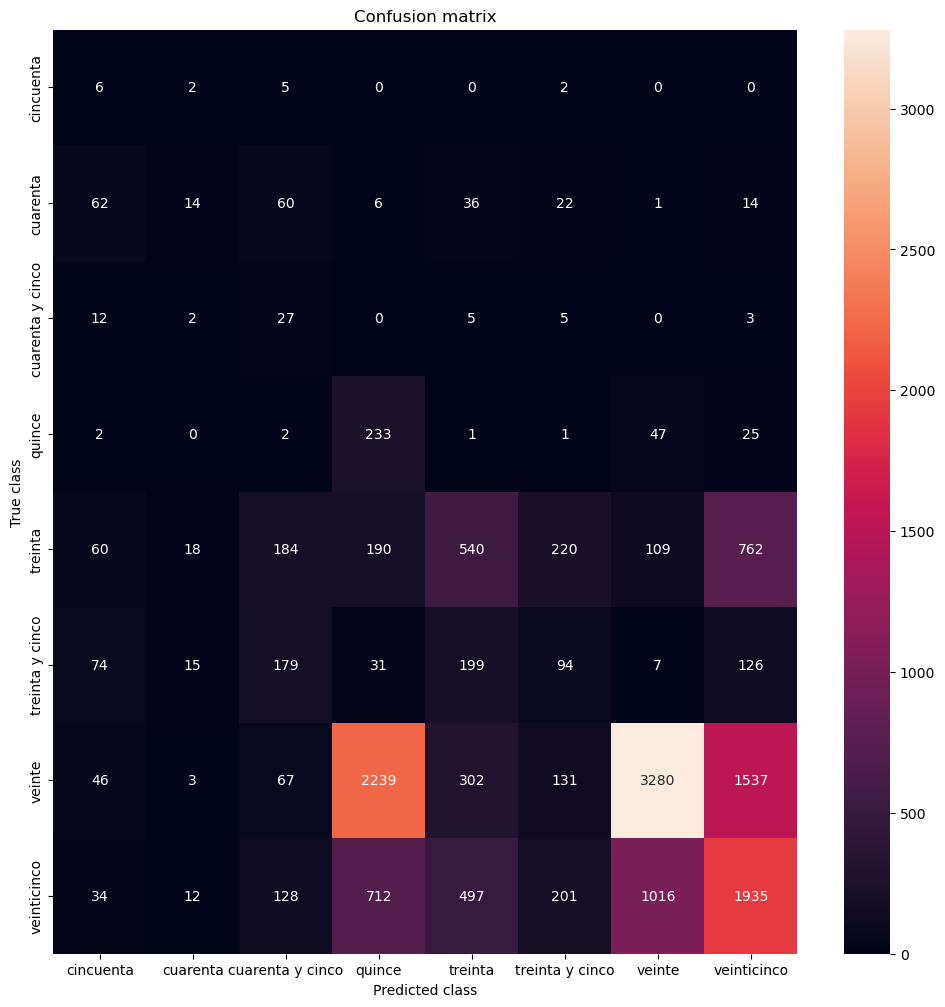

                  precision    recall  f1-score   support

       cincuenta       0.02      0.40      0.04        15
        cuarenta       0.21      0.07      0.10       215
cuarenta y cinco       0.04      0.50      0.08        54
          quince       0.07      0.75      0.13       311
         treinta       0.34      0.26      0.29      2083
 treinta y cinco       0.14      0.13      0.13       725
          veinte       0.74      0.43      0.54      7605
     veinticinco       0.44      0.43      0.43      4535

        accuracy                           0.39     15543
       macro avg       0.25      0.37      0.22     15543
    weighted avg       0.54      0.39      0.44     15543

Trabajando con el dataframe número 4
Ejecutando modelo sin balanceo


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Distribution Counter({'veinte': 8115, 'veinticinco': 7108, 'treinta': 4556, 'treinta y cinco': 1714, 'quince': 496, 'cuarenta': 455, 'cuarenta y cinco': 108, 'cincuenta': 39})


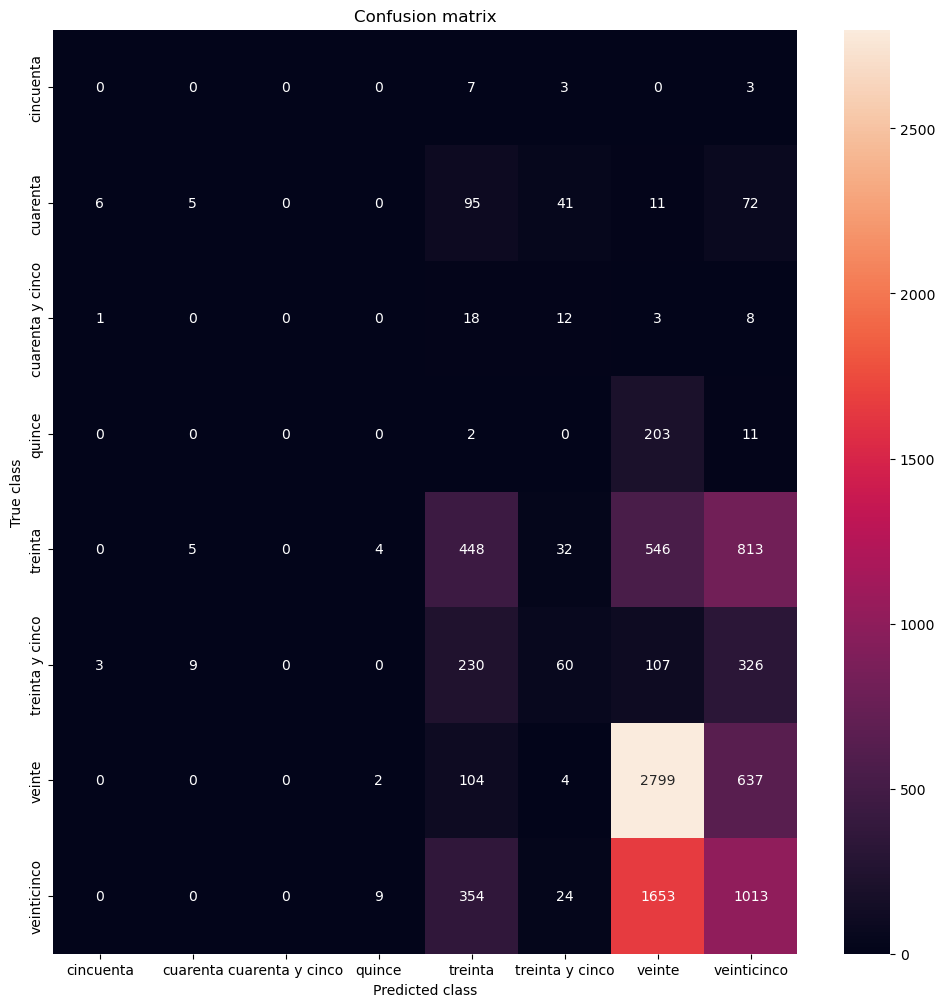

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                  precision    recall  f1-score   support

       cincuenta       0.00      0.00      0.00        13
        cuarenta       0.26      0.02      0.04       230
cuarenta y cinco       0.00      0.00      0.00        42
          quince       0.00      0.00      0.00       216
         treinta       0.36      0.24      0.29      1848
 treinta y cinco       0.34      0.08      0.13       735
          veinte       0.53      0.79      0.63      3546
     veinticinco       0.35      0.33      0.34      3053

        accuracy                           0.45      9683
       macro avg       0.23      0.18      0.18      9683
    weighted avg       0.40      0.45      0.40      9683

Ejecutando modelo con balanceo


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


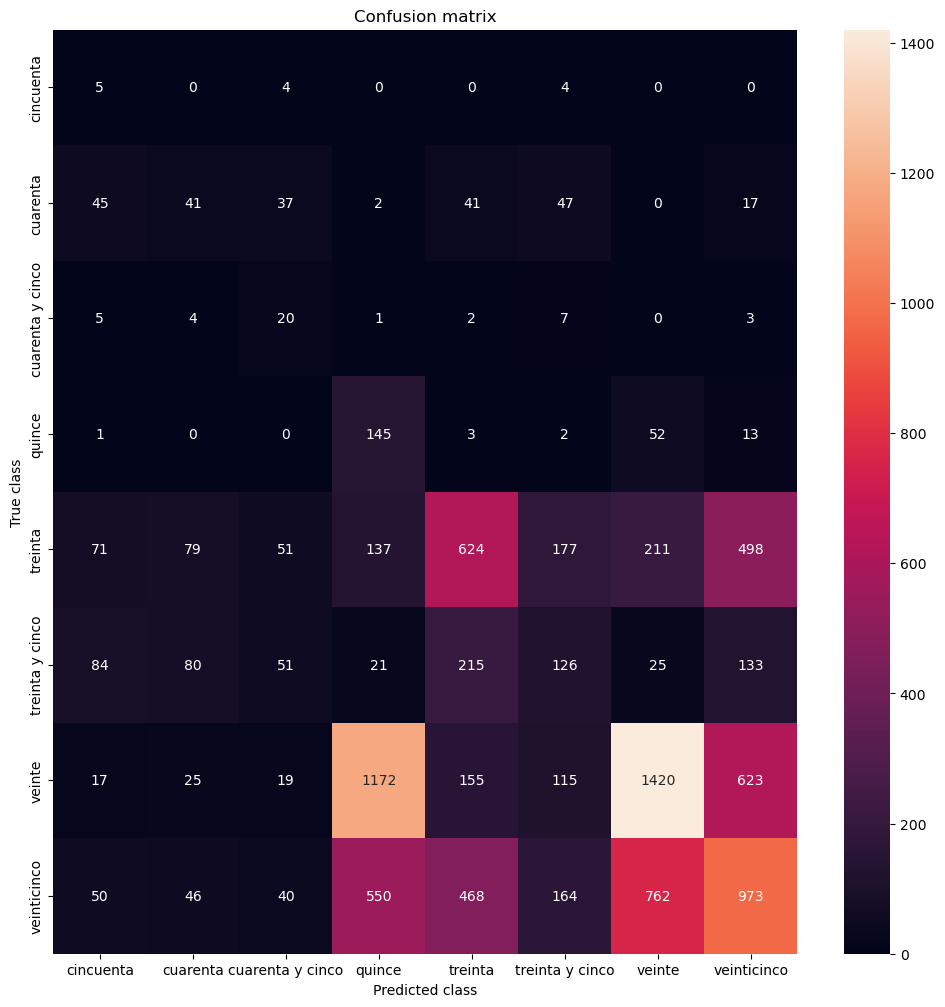

                  precision    recall  f1-score   support

       cincuenta       0.02      0.38      0.03        13
        cuarenta       0.15      0.18      0.16       230
cuarenta y cinco       0.09      0.48      0.15        42
          quince       0.07      0.67      0.13       216
         treinta       0.41      0.34      0.37      1848
 treinta y cinco       0.20      0.17      0.18       735
          veinte       0.57      0.40      0.47      3546
     veinticinco       0.43      0.32      0.37      3053

        accuracy                           0.35      9683
       macro avg       0.24      0.37      0.23      9683
    weighted avg       0.45      0.35      0.38      9683

Ejecutando modelo con undersampling NearMiss


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


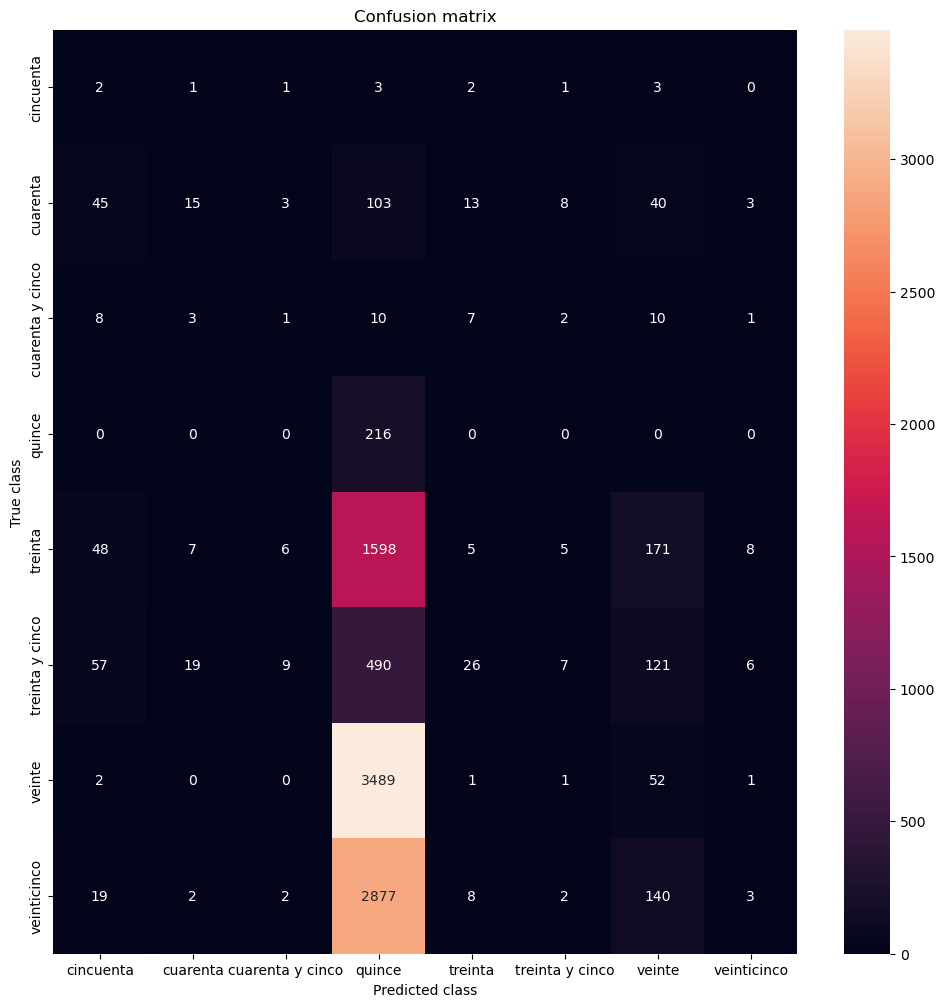

                  precision    recall  f1-score   support

       cincuenta       0.01      0.15      0.02        13
        cuarenta       0.32      0.07      0.11       230
cuarenta y cinco       0.05      0.02      0.03        42
          quince       0.02      1.00      0.05       216
         treinta       0.08      0.00      0.01      1848
 treinta y cinco       0.27      0.01      0.02       735
          veinte       0.10      0.01      0.03      3546
     veinticinco       0.14      0.00      0.00      3053

        accuracy                           0.03      9683
       macro avg       0.12      0.16      0.03      9683
    weighted avg       0.12      0.03      0.02      9683

Ejecutando modelo con SMOTETomek
Distribution before resampling Counter({'veinte': 8115, 'veinticinco': 7108, 'treinta': 4556, 'treinta y cinco': 1714, 'quince': 496, 'cuarenta': 455, 'cuarenta y cinco': 108, 'cincuenta': 39})
Distribution after resampling Counter({'veinte': 7329, 'veinticinco': 6176

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


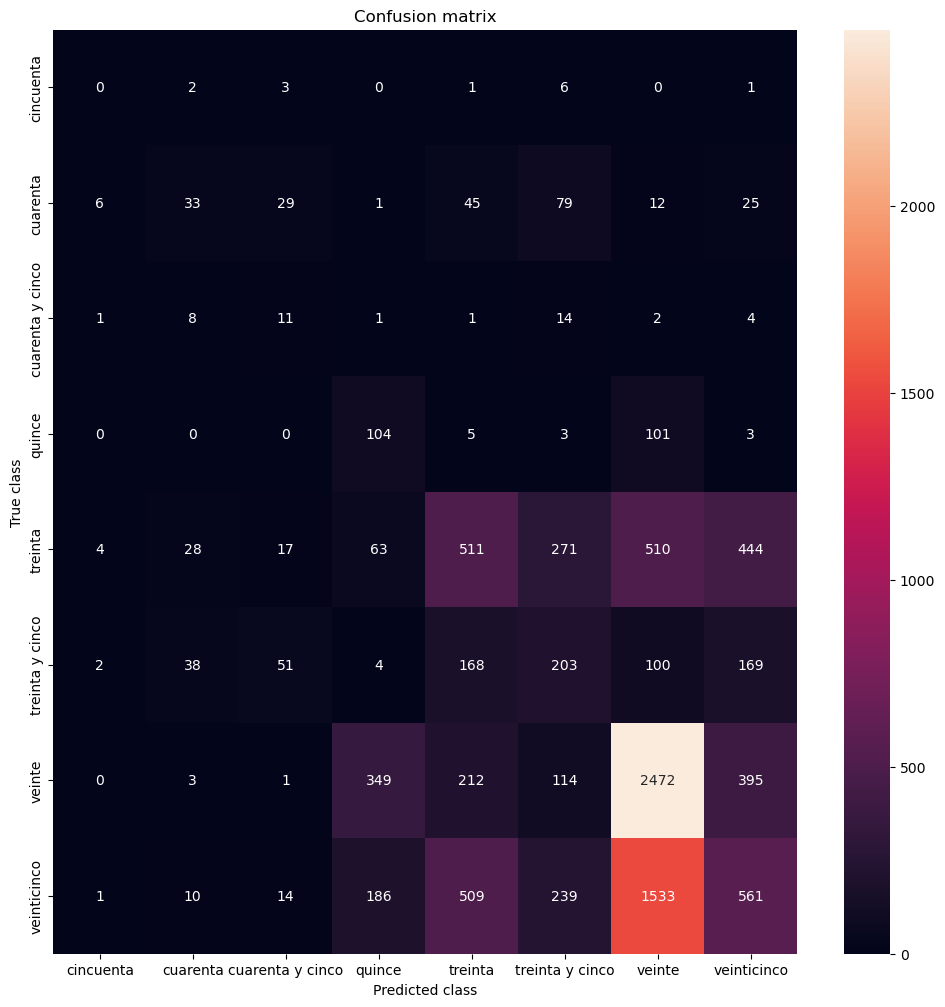

                  precision    recall  f1-score   support

       cincuenta       0.00      0.00      0.00        13
        cuarenta       0.27      0.14      0.19       230
cuarenta y cinco       0.09      0.26      0.13        42
          quince       0.15      0.48      0.23       216
         treinta       0.35      0.28      0.31      1848
 treinta y cinco       0.22      0.28      0.24       735
          veinte       0.52      0.70      0.60      3546
     veinticinco       0.35      0.18      0.24      3053

        accuracy                           0.40      9683
       macro avg       0.24      0.29      0.24      9683
    weighted avg       0.40      0.40      0.38      9683

Ejecutando modelo con SMOTE
Distribution before resampling Counter({'veinte': 8115, 'veinticinco': 7108, 'treinta': 4556, 'treinta y cinco': 1714, 'quince': 496, 'cuarenta': 455, 'cuarenta y cinco': 108, 'cincuenta': 39})
Distribution after resampling Counter({'treinta': 8115, 'treinta y cinco': 8115

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


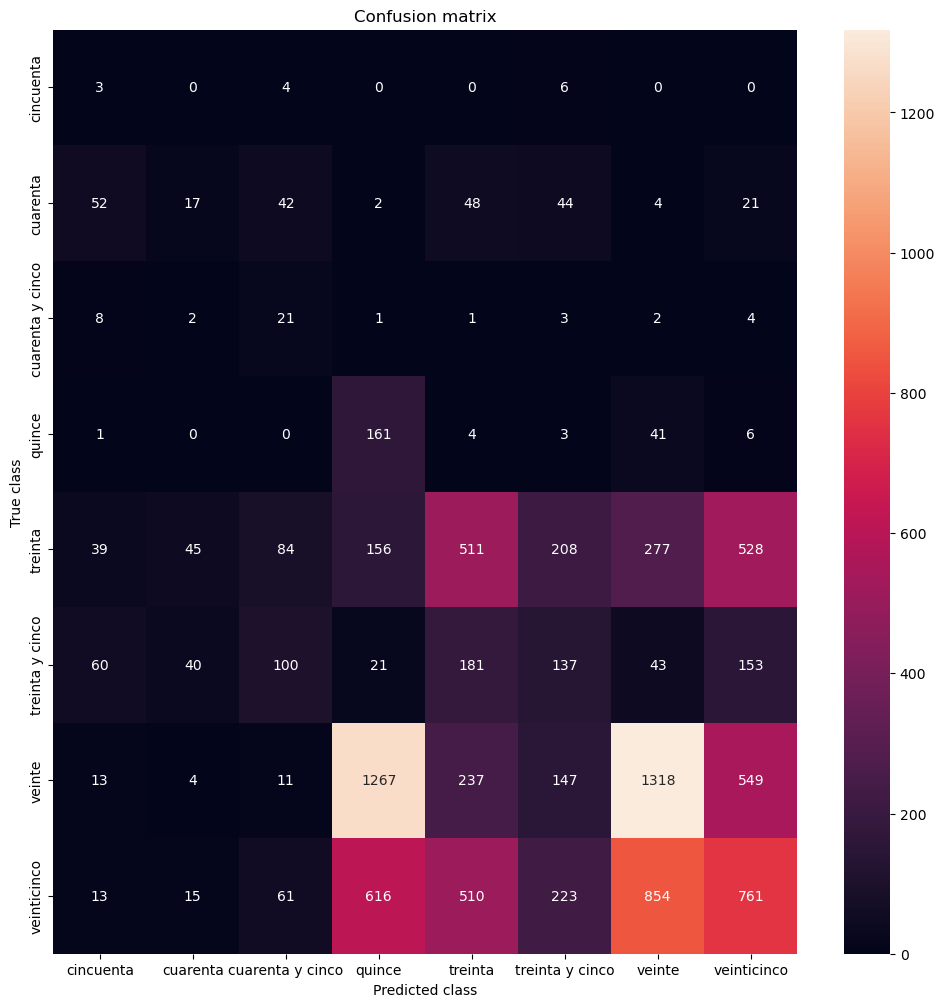

                  precision    recall  f1-score   support

       cincuenta       0.02      0.23      0.03        13
        cuarenta       0.14      0.07      0.10       230
cuarenta y cinco       0.07      0.50      0.12        42
          quince       0.07      0.75      0.13       216
         treinta       0.34      0.28      0.31      1848
 treinta y cinco       0.18      0.19      0.18       735
          veinte       0.52      0.37      0.43      3546
     veinticinco       0.38      0.25      0.30      3053

        accuracy                           0.30      9683
       macro avg       0.21      0.33      0.20      9683
    weighted avg       0.39      0.30      0.33      9683

Ejecutando modelo con Balanced Bagging Classifier


C:\Users\ASUS\anaconda3\lib\site-packages\imblearn\ensemble\_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/

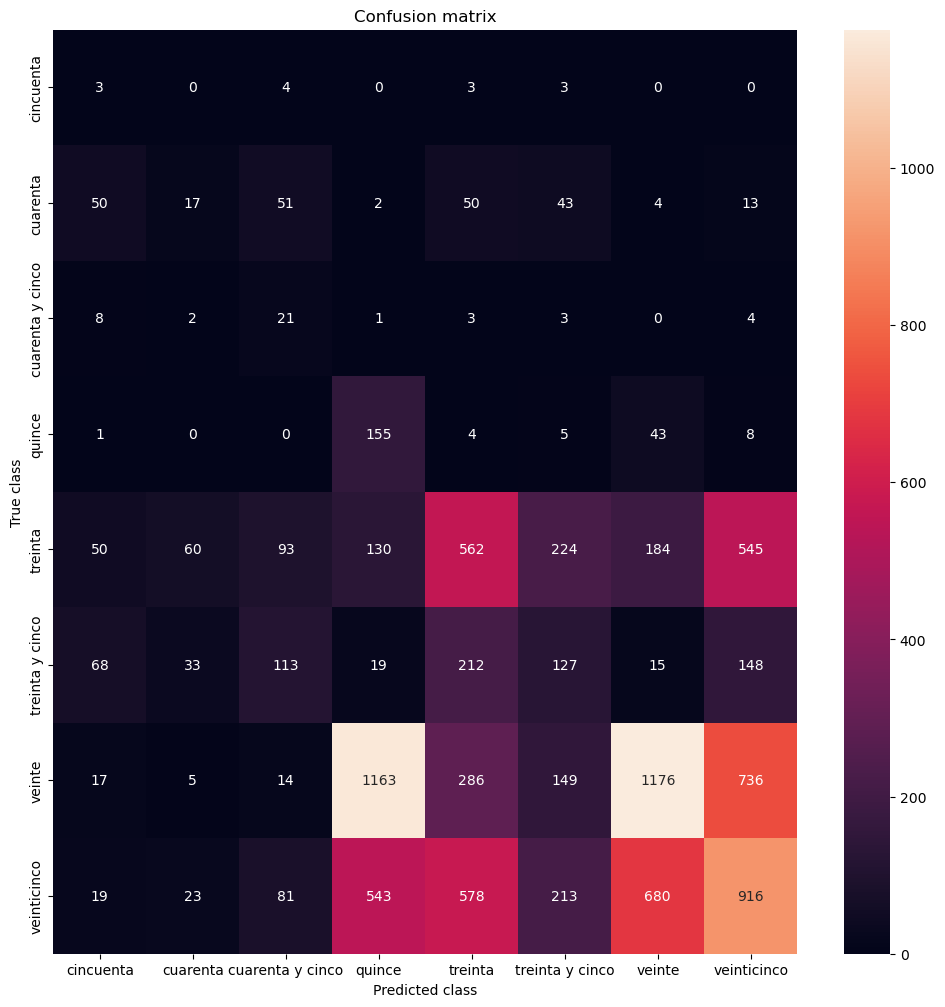

                  precision    recall  f1-score   support

       cincuenta       0.01      0.23      0.03        13
        cuarenta       0.12      0.07      0.09       230
cuarenta y cinco       0.06      0.50      0.10        42
          quince       0.08      0.72      0.14       216
         treinta       0.33      0.30      0.32      1848
 treinta y cinco       0.17      0.17      0.17       735
          veinte       0.56      0.33      0.42      3546
     veinticinco       0.39      0.30      0.34      3053

        accuracy                           0.31      9683
       macro avg       0.21      0.33      0.20      9683
    weighted avg       0.41      0.31      0.34      9683



In [17]:
dataframes = [df_category, df_edit_category, df_2017_category, df_edit_2017_category]
run_analysis(dataframes)

## ANÁLISIS DE BALANCEO

Para analizar estos resultados, debemos recordar que el objetivo del balanceo de clases es mejorar la capacidad del modelo para clasificar correctamente las clases minoritarias. Dicho esto, hay tres métricas principales que queremos observar: precisión, recall y F1-score.

La precisión es la relación entre las instancias positivas predichas correctamente y las instancias totales predichas como positivas. El recall, también conocido como sensibilidad, es la relación entre las instancias positivas predichas correctamente y todas las instancias que son realmente positivas. Por otro lado, el F1-score es la media armónica de la precisión y el recall, y es una medida útil cuando queremos tener en cuenta tanto la precisión como el recall.

### DATAFRAME COMPLETO

De los resultados obtenidos, parece que la técnica de SMOTETomek genera el balance más sólido entre precisión, recall y F1-score, considerando las diferentes métricas y clases. Aunque no tiene los valores más altos en todas las categorías, muestra un rendimiento consistente en todas las métricas y clases.

**Análisis del método SMOTETomek:**

- Para las clases con menos muestras (como 'cincuenta', 'cuarenta', 'cuarenta y cinco', y 'quince'), vemos un aumento significativo en el recall comparado con el modelo sin balanceo. Esto es una señal positiva ya que indica que el modelo ahora es capaz de identificar mejor estas clases minoritarias.

- Al mismo tiempo, vemos un ligero sacrificio en la precisión para algunas clases. Esto podría ser aceptable si nuestro objetivo es priorizar la detección de las clases minoritarias, aunque podría conducir a un mayor número de falsos positivos.

- En términos del F1-score, que es una métrica que combina precisión y recall, SMOTETomek presenta valores consistentemente más altos para todas las clases en comparación con el modelo sin balanceo. Esto sugiere que este enfoque podría proporcionar un equilibrio razonable entre precisión y recall para nuestras necesidades.

Deberíamos tener en cuenta que, aunque SMOTETomek parece ofrecer un buen equilibrio, el mejor método de balanceo de clases puede variar dependiendo de las necesidades específicas del proyecto. Si es más importante minimizar los falsos positivos, podrías querer elegir un método que optimice la precisión. La precisión es la relación entre las instancias positivas predichas correctamente y las instancias totales predichas como positivas. En otras palabras, una precisión alta significa que el modelo tiene un porcentaje bajo de falsos positivos.

Según los resultados obtenidos, parece que la estrategia de balanceo que ofrece la mayor precisión en general es la de "Penalización". Aunque en términos de recall y F1-score no es la mejor, este método tiende a ofrecer una precisión relativamente alta en todas las clases, lo que indica que minimiza los falsos positivos.

También es esencial considerar que, para garantizar una comparación justa entre los diferentes métodos de balanceo, se utilizó un modelo de regresión logística en todos los casos. Sin embargo, vale la pena explorar otros algoritmos que potencialmente podrían ofrecer resultados superiores.

### DATAFRAME COMPLETO EDITADO

El método 'SMOTETomek' ofrece un buen compromiso entre precisión media y precisión ponderada. Aunque no obtiene el máximo en ninguna de estas métricas, se acerca mucho en ambas, y su rendimiento en todas las clases es más equilibrado que los otros métodos.

**Ahora, analicemos en profundidad 'SMOTETomek':**

SMOTETomek ha proporcionado un rendimiento bastante equilibrado en todas las clases, con valores de precisión y recall variando entre 0.08 y 0.47, y 0.14 y 0.63, respectivamente. Lo que es notable acerca de este método de balanceo es que, a diferencia del escenario sin balanceo, todas las clases se predicen con una precisión no nula. Además, SMOTETomek logra un recall relativamente alto para las clases menos representadas, como 'cincuenta', 'cuarenta y cinco' y 'quince', lo que indica que este método es más eficaz para detectar instancias de estas clases.

En cuanto a las clases más representadas, 'veinte' y 'veinticinco', SMOTETomek logra un rendimiento sólido, aunque no tan alto como en el escenario sin balanceo. Sin embargo, es importante destacar que el rendimiento más equilibrado en todas las clases puede ser más valioso en muchos escenarios, especialmente si el coste de no detectar instancias de las clases menos representadas es alto.

En resumen, SMOTETomek parece ser el mejor compromiso entre el rendimiento en las clases más y menos representadas.

### DATAFRAME SIN EDICIÓN 2017-2022

Para evaluar qué técnica de balanceo de clases ha funcionado mejor en este caso, necesitamos observar varias métricas como precisión (precision), exhaustividad (recall) y la puntuación F1 (f1-score). El análisis se basa en el compromiso entre estas métricas.

Teniendo en cuenta los resultados, se consideraría que SMOTETomek es el mejor método de balanceo en este caso, ya que logra un equilibrio razonable entre precisión, recall y puntuación F1 para todas las clases. Mientras que la precisión puede haber disminuido un poco para las clases minoritarias en comparación con el conjunto sin balanceo, el recall ha mejorado significativamente, lo que significa que el modelo es capaz de identificar correctamente más ejemplos de estas clases. La precisión y recall para la clase mayoritaria también sigue siendo razonablemente alta.

### DATAFRAME CON EDICIÓN 2017-2022

Mirando los resultados en su totalidad, si se valoran por igual todas las clases, el método de PENALIZACIÓN parece ser el más adecuado, ya que ofrece el recall más equilibrado a través de todas las clases, a pesar de tener una precisión general más baja. Asegura que todas las clases estén representadas adecuadamente, a pesar de su tamaño.

Si se valora más la precisión general y se puede aceptar un recall más bajo para las clases más pequeñas, el método SIN BALANCEO tiene la precisión general más alta.

Sin embargo, si se valora el equilibrio entre precisión y recall, el Balanced Bagging Classifier parece ser el más apropiado.

En este análisis, voy a elegir el método PENALIZACIÓN como el mejor para este caso, ya que ofrece el recall más equilibrado en todas las clases.

La estrategia de PENALIZACIÓN pone mayor énfasis en las clases minoritarias al asignarles una penalización mayor durante el entrenamiento. Esto puede ayudar a que el modelo preste más atención a estas clases difíciles de predecir. Aunque el puntaje de precisión es más bajo que con otras estrategias, la mejora en el recall es significativa. Esto indica que, aunque el modelo puede hacer más predicciones incorrectas (lo que resulta en una precisión más baja), es mucho mejor para identificar las observaciones de todas las clases, especialmente las clases minoritarias (lo que se refleja en el alto recall).

Para enfatizar, una precisión más baja puede ser un sacrificio aceptable si la meta es aumentar el recall, especialmente cuando es importante minimizar los falsos negativos. Aunque los puntajes de F1 para algunas de las clases son bajos, el puntaje macro promedio de F1 es más alto que el puntaje obtenido con el método SIN BALANCEO, lo que indica un rendimiento más equilibrado en todas las clases.

Además, aunque la precisión general ha disminuido, este método podría ser preferible si es más importante tener una cobertura de clase más equilibrada. Asegura que todas las clases estén representadas adecuadamente, a pesar de su tamaño.

En conclusión, la estrategia de PENALIZACIÓN parece ser la más apropiada si el objetivo es tener un modelo que pueda predecir todas las clases más equitativamente. Sin embargo, siempre es importante recordar que la elección de la estrategia de balanceo de clases debe estar guiada por el contexto y los objetivos del problema de modelado en cuestión.

Dado que el método SMOTETomek no resultó ser el más óptimo para este dataframe en particular, procederemos a realizar un análisis más detallado para determinar cuál técnica de balanceo es la más apropiada. Para ello, revisaremos nuevamente los métodos de balanceo utilizando un algoritmo más robusto que la regresión logística; en este caso, optaremos por el algoritmo de Bosques Aleatorios (Random Forest).

In [18]:
def run_new_analysis(dataframes, target_col='dosis_coagulante'):
    for i, df in enumerate(dataframes):
        print(f"Trabajando con el dataframe número {i+1}")
        
        # Preparar datos
        y = df[target_col]
        X = df.drop(target_col, axis=1)
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

        # Ejecutar modelo sin balanceo
        print("Ejecutando modelo sin balanceo")
        model = run_model(X_train, X_test, y_train, y_test)
        print ("Distribution {}".format(Counter(y_train)))
        pred_y = model.predict(X_test)
        mostrar_resultados(y_test, pred_y)

        # Ejecutar modelo con balanceo
        print("Ejecutando modelo con balanceo")
        model = run_model_balanced(X_train, X_test, y_train, y_test)
        pred_y = model.predict(X_test)
        mostrar_resultados(y_test, pred_y)

        # Ejecutar modelo con undersampling NearMiss
        print("Ejecutando modelo con undersampling NearMiss")
        us = NearMiss(sampling_strategy='auto', n_neighbors=3, version=2)
        X_train_res, y_train_res = us.fit_resample(X_train, y_train)
        model = run_model(X_train_res, X_test, y_train_res, y_test)
        pred_y = model.predict(X_test)
        mostrar_resultados(y_test, pred_y)
        
        # Obtener la muestra más grande
        count_class = Counter(y_train)
        max_sample = max(count_class.values())

        # Determinar el decremento basado en el tamaño de la muestra más grande
        decrement = 0
        if max_sample > 20000:
            decrement = 3000
        elif max_sample <= 20000 and max_sample > 15000:
            decrement = 1500
        else:
            decrement = 1000

        # Ejecutando modelo con SMOTETomek
        print("Ejecutando modelo con SMOTETomek")
        
        # Crear estrategia de muestreo
        sampling_strategy = {}
        decrement_multiplier = 0
        for class_label in sorted(count_class, key=count_class.get, reverse=True):
            sample_value = max_sample - decrement_multiplier*decrement
            # Asegurarse de que el valor de muestreo no sea menor que el conteo de clases original
            sampling_strategy[class_label] = max(sample_value, count_class[class_label])
            decrement_multiplier += 1

        os_us = SMOTETomek(sampling_strategy=sampling_strategy)
        X_train_res, y_train_res = os_us.fit_resample(X_train, y_train)

        print ("Distribution before resampling {}".format(Counter(y_train)))
        print ("Distribution after resampling {}".format(Counter(y_train_res)))

        model = run_model(X_train_res, X_test, y_train_res, y_test)
        pred_y = model.predict(X_test)
        mostrar_resultados(y_test, pred_y)

        # Ejecutar modelo con SMOTE
        print("Ejecutando modelo con SMOTE")
        sm = SMOTE(sampling_strategy='auto', k_neighbors=3, random_state=1)
        X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
        print ("Distribution before resampling {}".format(Counter(y_train)))
        print ("Distribution after resampling {}".format(Counter(y_train_res)))
        model = run_model(X_train_res, X_test, y_train_res, y_test)
        pred_y = model.predict(X_test)
        mostrar_resultados(y_test, pred_y)

        # Ejecutar modelo con Balanced Bagging Classifier
        print("Ejecutando modelo con Balanced Bagging Classifier")
        bbc = BalancedBaggingClassifier(base_estimator= RandomForestClassifier(),
                                        sampling_strategy='auto',
                                        replacement=False,
                                        random_state=0)
        bbc.fit(X_train, y_train)
        pred_y = bbc.predict(X_test)
        mostrar_resultados(y_test, pred_y)

def run_model(X_train, X_test, y_train, y_test):
    clf_base = RandomForestClassifier()
    clf_base.fit(X_train, y_train)
    return clf_base

def run_model_balanced(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
    clf.fit(X_train, y_train)
    return clf

def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    LABELS = np.unique(y_test) # Aquí cambiamos 'y' por 'y_test'
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))

Trabajando con el dataframe número 1
Ejecutando modelo sin balanceo
Distribution Counter({'veinte': 8115, 'veinticinco': 7108, 'treinta': 4556, 'treinta y cinco': 1714, 'quince': 496, 'cuarenta': 455, 'cuarenta y cinco': 108, 'cincuenta': 39})


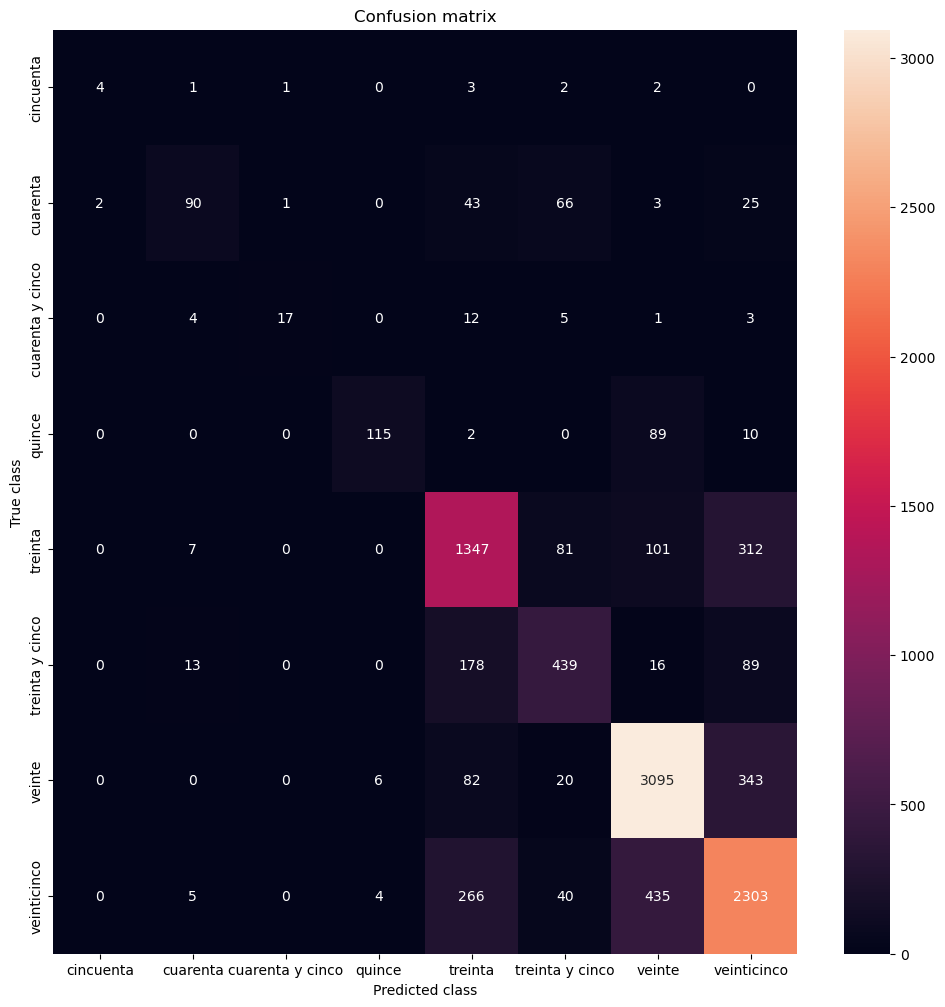

                  precision    recall  f1-score   support

       cincuenta       0.67      0.31      0.42        13
        cuarenta       0.75      0.39      0.51       230
cuarenta y cinco       0.89      0.40      0.56        42
          quince       0.92      0.53      0.67       216
         treinta       0.70      0.73      0.71      1848
 treinta y cinco       0.67      0.60      0.63       735
          veinte       0.83      0.87      0.85      3546
     veinticinco       0.75      0.75      0.75      3053

        accuracy                           0.77      9683
       macro avg       0.77      0.57      0.64      9683
    weighted avg       0.77      0.77      0.76      9683

Ejecutando modelo con balanceo


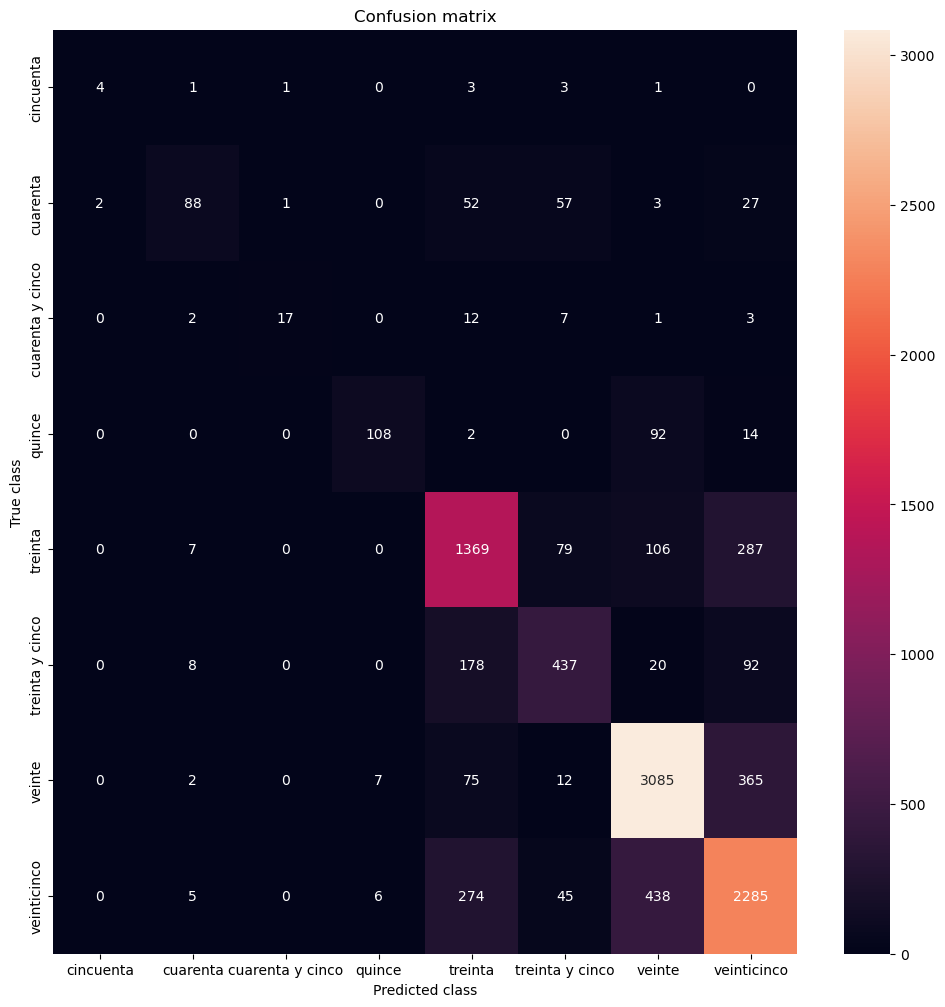

                  precision    recall  f1-score   support

       cincuenta       0.67      0.31      0.42        13
        cuarenta       0.78      0.38      0.51       230
cuarenta y cinco       0.89      0.40      0.56        42
          quince       0.89      0.50      0.64       216
         treinta       0.70      0.74      0.72      1848
 treinta y cinco       0.68      0.59      0.64       735
          veinte       0.82      0.87      0.85      3546
     veinticinco       0.74      0.75      0.75      3053

        accuracy                           0.76      9683
       macro avg       0.77      0.57      0.63      9683
    weighted avg       0.76      0.76      0.76      9683

Ejecutando modelo con undersampling NearMiss


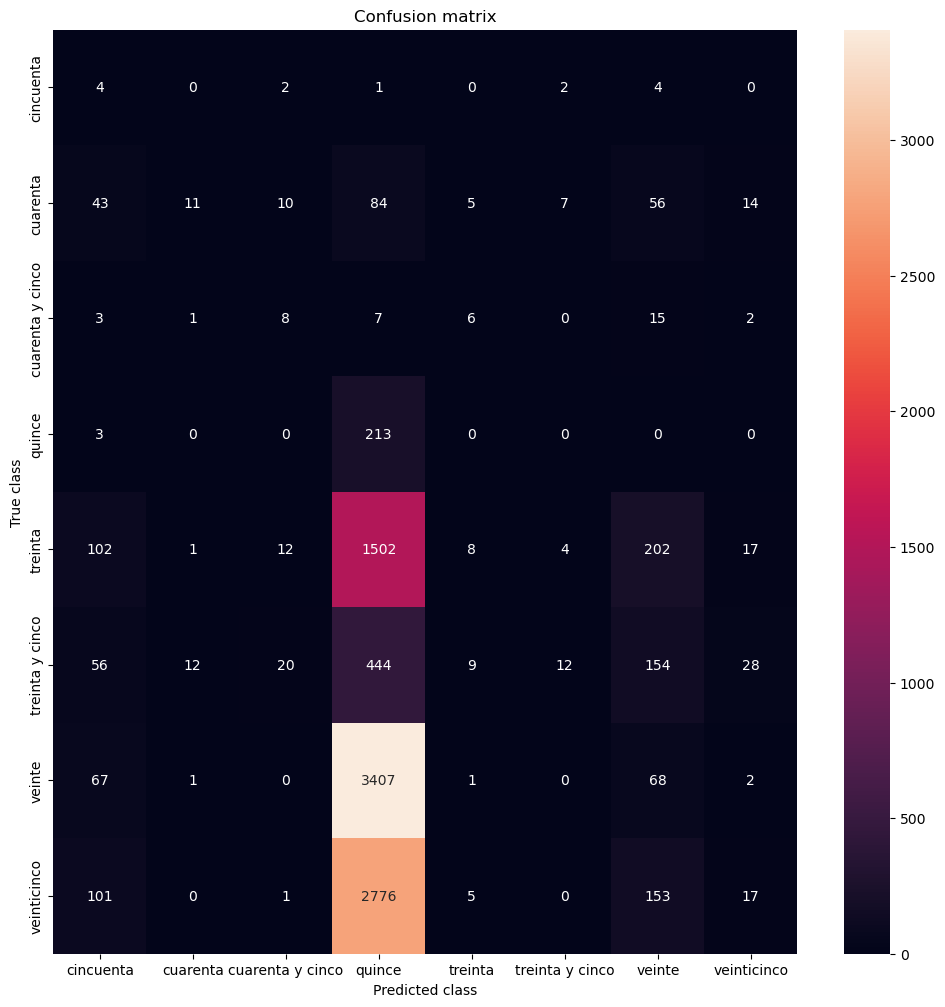

                  precision    recall  f1-score   support

       cincuenta       0.01      0.31      0.02        13
        cuarenta       0.42      0.05      0.09       230
cuarenta y cinco       0.15      0.19      0.17        42
          quince       0.03      0.99      0.05       216
         treinta       0.24      0.00      0.01      1848
 treinta y cinco       0.48      0.02      0.03       735
          veinte       0.10      0.02      0.03      3546
     veinticinco       0.21      0.01      0.01      3053

        accuracy                           0.04      9683
       macro avg       0.21      0.20      0.05      9683
    weighted avg       0.20      0.04      0.02      9683

Ejecutando modelo con SMOTETomek
Distribution before resampling Counter({'veinte': 8115, 'veinticinco': 7108, 'treinta': 4556, 'treinta y cinco': 1714, 'quince': 496, 'cuarenta': 455, 'cuarenta y cinco': 108, 'cincuenta': 39})
Distribution after resampling Counter({'veinte': 7345, 'veinticinco': 6172

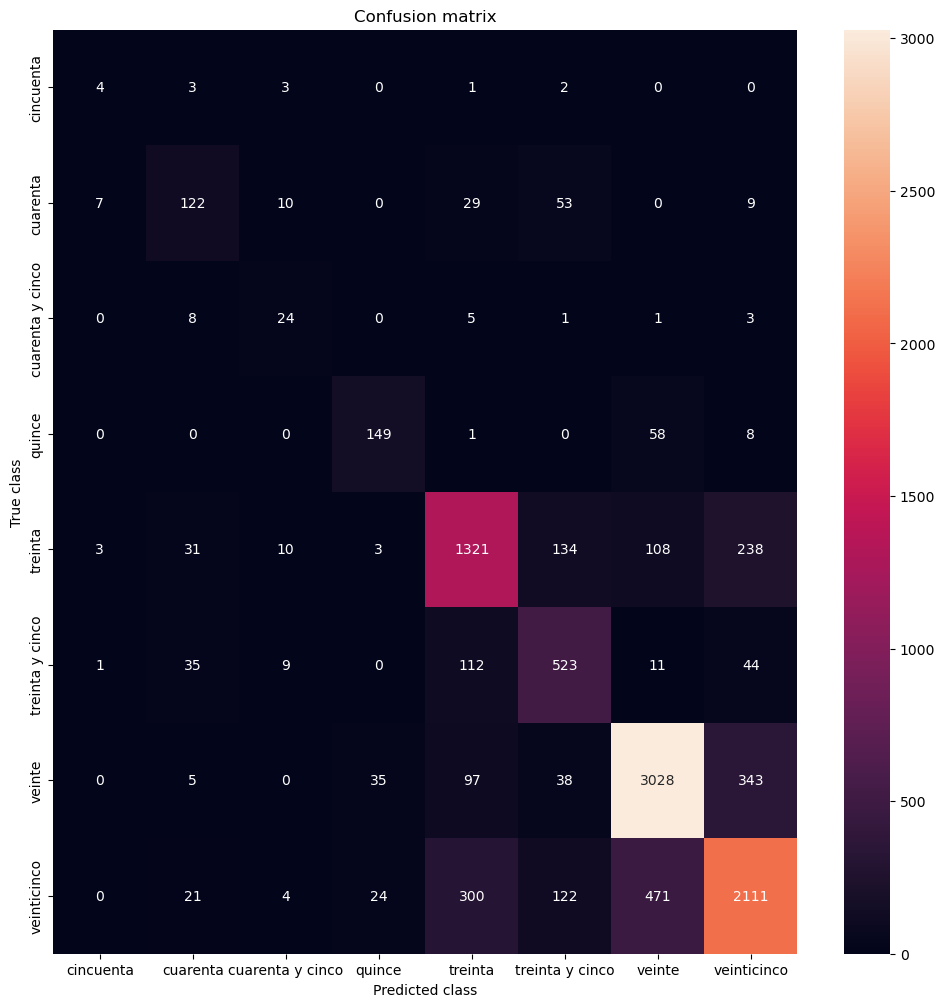

                  precision    recall  f1-score   support

       cincuenta       0.27      0.31      0.29        13
        cuarenta       0.54      0.53      0.54       230
cuarenta y cinco       0.40      0.57      0.47        42
          quince       0.71      0.69      0.70       216
         treinta       0.71      0.71      0.71      1848
 treinta y cinco       0.60      0.71      0.65       735
          veinte       0.82      0.85      0.84      3546
     veinticinco       0.77      0.69      0.73      3053

        accuracy                           0.75      9683
       macro avg       0.60      0.63      0.61      9683
    weighted avg       0.75      0.75      0.75      9683

Ejecutando modelo con SMOTE
Distribution before resampling Counter({'veinte': 8115, 'veinticinco': 7108, 'treinta': 4556, 'treinta y cinco': 1714, 'quince': 496, 'cuarenta': 455, 'cuarenta y cinco': 108, 'cincuenta': 39})
Distribution after resampling Counter({'treinta': 8115, 'treinta y cinco': 8115

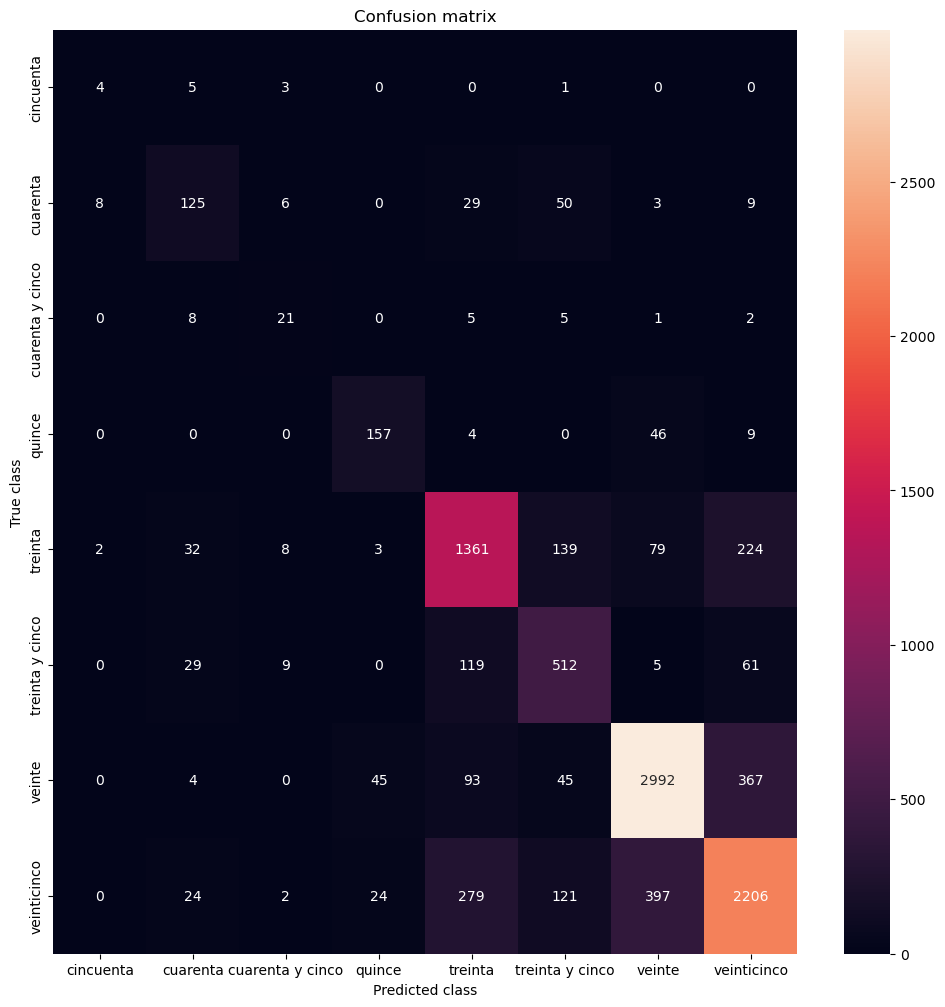

                  precision    recall  f1-score   support

       cincuenta       0.29      0.31      0.30        13
        cuarenta       0.55      0.54      0.55       230
cuarenta y cinco       0.43      0.50      0.46        42
          quince       0.69      0.73      0.71       216
         treinta       0.72      0.74      0.73      1848
 treinta y cinco       0.59      0.70      0.64       735
          veinte       0.85      0.84      0.85      3546
     veinticinco       0.77      0.72      0.74      3053

        accuracy                           0.76      9683
       macro avg       0.61      0.63      0.62      9683
    weighted avg       0.77      0.76      0.76      9683

Ejecutando modelo con Balanced Bagging Classifier


C:\Users\ASUS\anaconda3\lib\site-packages\imblearn\ensemble\_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


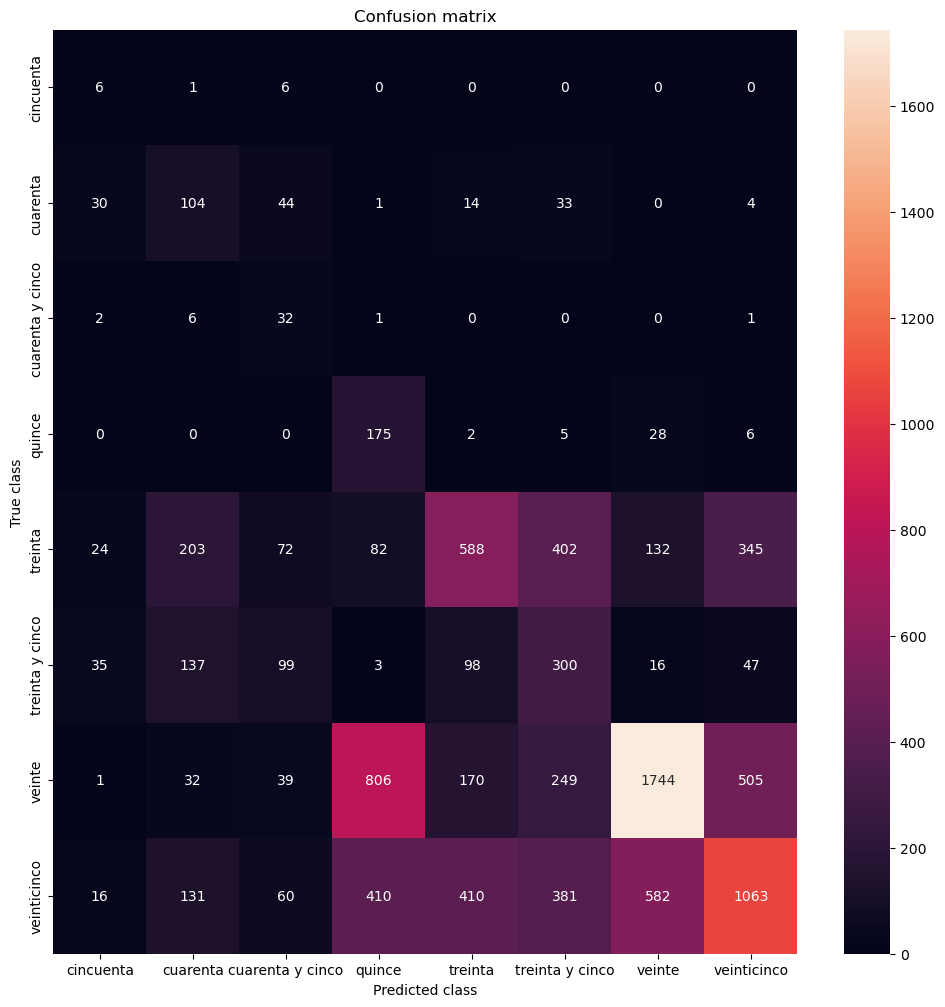

                  precision    recall  f1-score   support

       cincuenta       0.05      0.46      0.09        13
        cuarenta       0.17      0.45      0.25       230
cuarenta y cinco       0.09      0.76      0.16        42
          quince       0.12      0.81      0.21       216
         treinta       0.46      0.32      0.38      1848
 treinta y cinco       0.22      0.41      0.29       735
          veinte       0.70      0.49      0.58      3546
     veinticinco       0.54      0.35      0.42      3053

        accuracy                           0.41      9683
       macro avg       0.29      0.51      0.30      9683
    weighted avg       0.54      0.41      0.45      9683



In [19]:
dataframes = [df_edit_2017_category]
run_new_analysis(dataframes)

1. **Sin Balanceo:** Esta es la línea de base. Tiene una precisión ponderada y una exactitud del 77%, pero tiene un rendimiento deficiente para las clases minoritarias.

2. **Penalización:** Este método tiene una precisión y exactitud ponderada similar al enfoque sin balanceo, pero aún así no logra mejorar el recall para las clases minoritarias.

3. **Submuestreo:** Aunque este método mejoró el recall para algunas clases minoritarias, se produjo una caída significativa en la precisión y la exactitud en general.

4. **SMOTETomek:** Este método mejoró el recall para las clases minoritarias sin comprometer demasiado la precisión. Tiene una exactitud y precisión ponderada del 75%.

5. **SMOTE:** Este método también mejoró el recall para las clases minoritarias y tuvo una precisión y exactitud ponderada del 77%.

6. **Balanced Bagging Classifier:** Este método mostró una mejora significativa en el recall para las clases minoritarias, pero a costa de una caída en la precisión.

Viendo estas métricas, la técnica de SMOTE parece proporcionar el mejor equilibrio entre la precisión y el recall. Esta técnica logra una precisión y exactitud ponderada similar a la del modelo sin balanceo, pero con una mejora considerable en el recall de las clases minoritarias. Esto significa que la técnica SMOTE es capaz de mantener una alta tasa de predicciones correctas, al tiempo que mejora la capacidad del modelo para identificar correctamente las clases minoritarias.

Si profundizamos en el análisis de las métricas del modelo SMOTE:

- Para la clase cincuenta, aunque la precisión no es muy alta (0.29), el recall es del 31%. Esto significa que de todos los elementos que son verdaderamente de la clase cincuenta, el 31% de ellos son identificados correctamente por el modelo.

- En la clase cuarenta, la precisión es de 0.54 y el recall de 0.55, mostrando un balance aceptable entre estas dos métricas.

- Similarmente, para la clase cuarenta y cinco, quince, treinta, treinta y cinco, veinte y veinticinco, el modelo muestra un rendimiento equilibrado en términos de precisión y recall.

Además, si observamos el promedio macro, que calcula la métrica para cada etiqueta y encuentra su media sin tener en cuenta la proporción para cada etiqueta en el conjunto de datos, encontramos que el recall (0.64) es mejor comparado con los otros métodos, lo que indica una mejora en la clasificación de clases minoritarias.

En resumen, el método de balanceo SMOTE parece ser el más efectivo dado que mejora la capacidad del modelo para detectar clases minoritarias sin sacrificar demasiado la precisión general.

## CONCLUSIÓN

Tras una exhaustiva evaluación, se ha evidenciado que el método SMOTETomek ha sido el más eficaz en el equilibrio de nuestros conjuntos de datos totales, en sus versiones tanto original como modificada, así como para el conjunto de datos que recopila información desde el año 2017 en su versión sin modificaciones. No obstante, en el caso del conjunto de datos modificado que comprende información a partir del año 2017, el método SMOTE se ha destacado como la opción más óptima.

Teniendo en cuenta estos resultados, proponemos la implementación de la estrategia de balanceo de clases más apropiada para cada conjunto de datos. Así, adoptaremos el método SMOTETomek para los conjuntos de datos totales y para aquel que se inicia en 2017 sin modificaciones. Por otro lado, optaremos por el método SMOTE para el conjunto de datos editado que comienza en 2017. Esta propuesta se basa en nuestro objetivo de optimizar la eficacia de nuestros modelos para cada situación en particular, con el fin de garantizar la máxima precisión y sensibilidad (recall) posibles.

No obstante, antes de llevar a cabo esta implementación, consideraremos la pertinencia de aplicar técnicas de normalización y/o estandarización, ya que estas podrían incrementar la eficiencia de los métodos de balanceo seleccionados y, por ende, mejorar el rendimiento general de nuestros modelos.

### PRIMERA PRUEBA: ESTANDARIZACIÓN O NORMALIZACIÓN DE LOS DATOS

### Análisis de datos

La estandarización y la normalización son transformaciones lineales que cambian la escala de los datos pero mantienen su distribución. La estandarización cambia los datos para que tengan una media de 0 y una desviación estándar de 1, mientras que la normalización cambia los datos para que todos los valores estén entre 0 y 1.

Hay algunas situaciones en las que podría tener sentido estandarizar algunas columnas y normalizar otras. Por ejemplo:

Si se tienen algunas características con una distribución que se aproxima a la normal y otras con una distribución diferente, podría tener sentido estandarizar las características que se distribuyen normalmente y normalizar las otras.

Si algunas de las características tienen valores atípicos significativos, podría tener sentido estandarizar esas características para reducir el impacto de los valores atípicos. Las otras características podrían ser normalizadas.

Algunos modelos de aprendizaje automático asumen que las características están estandarizadas (por ejemplo, modelos lineales con regularización, SVMs), mientras que otros modelos pueden funcionar mejor con características normalizadas (por ejemplo, K-NN). 

Teniendo claro esto se procederá a ver la distribución de las variables y se implementará estandarización o normalización según convenga. Para ello se analizará estadística descriptiva, la prueba anderson y QQ-plots para definir si los datos se distribuyen normalmente.

In [20]:
df_category.describe()

caudal  agua_cruda_p_h  agua_cruda_ntu  agua_cruda_alcalinidad  \
count  86050.000000    86050.000000    86050.000000            86050.000000   
mean     600.773227        7.583271       11.194165               33.617389   
std       74.030936        0.285240       33.518630                6.329575   
min      200.000000        6.100000        0.400000                0.000000   
25%      550.000000        7.400000        2.200000               29.974000   
50%      605.000000        7.600000        3.000000               34.000000   
75%      651.000000        7.800000        6.500000               38.000000   
max      800.000000        9.700000      795.000000               90.800000   

       agua_cruda_conductividad    vel_viento  precipitacion   temp_humeda  \
count              86050.000000  86050.000000   86050.000000  86050.000000   
mean                  74.994551      1.563001       0.343974     16.464852   
std                   23.173689      0.872084       1.217089      2.314693   
min                    0.000000      0.241667       0.000000      8.600000   
25%                   60.100000      1.025000       0.000000     14.820000   
50%                   73.700000      1.391667       0.002000     16.492000   
75%                   84.764000      1.866667       0.100000     18.000000   
max                  476.000000     10.208333      47.900000     28.000000   

       clasificador_mensual  
count          86050.000000  
mean               0.663614  
std                0.472475  
min                0.000000  
25%                0.000000  
50%                1.000000  
75%                1.000000  
max                1.000000

In [21]:
df_edit_category.describe()

caudal  agua_cruda_p_h  agua_cruda_ntu  agua_cruda_alcalinidad  \
count  51573.000000    51573.000000    51573.000000            51573.000000   
mean     593.464385        7.518788       17.255016               31.720739   
std       72.393955        0.281720       42.222930                6.477570   
min      200.000000        6.100000        0.400000                1.600000   
25%      545.000000        7.400000        3.300000               27.000000   
50%      600.000000        7.500000        5.300000               32.000000   
75%      647.000000        7.700000       12.200000               36.000000   
max      800.000000        9.700000      795.000000               90.800000   

       agua_cruda_conductividad    vel_viento  precipitacion   temp_humeda  \
count              51573.000000  51573.000000   51573.000000  51573.000000   
mean                  72.703997      1.426227       0.453553     16.371060   
std                   25.717299      0.719317       1.394781      2.064143   
min                    0.000000      0.241667       0.000000      8.600000   
25%                   55.200000      0.968750       0.000000     14.862000   
50%                   68.500000      1.289167       0.012000     16.172000   
75%                   83.400000      1.741667       0.102000     18.007000   
max                  476.000000     10.208333      35.600000     27.000000   

       clasificador_mensual  
count          51573.000000  
mean               0.774242  
std                0.418084  
min                0.000000  
25%                1.000000  
50%                1.000000  
75%                1.000000  
max                1.000000

In [22]:
df_2017_category.describe()

caudal  agua_cruda_p_h  agua_cruda_color  agua_cruda_alcalinidad  \
count  51808.000000    51808.000000      51808.000000            51808.000000   
mean     603.610175        7.642238         21.279076               33.223090   
std       70.455045        0.282925         38.934908                6.771298   
min      210.000000        6.100000          0.000000                0.000000   
25%      566.750000        7.500000          7.400000               28.000000   
50%      610.000000        7.600000         10.000000               33.000000   
75%      650.000000        7.800000         18.200000               38.000000   
max      800.000000        8.900000        498.000000               90.800000   

       agua_cruda_conductividad    vel_viento  precipitacion   temp_humeda  \
count              51808.000000  51808.000000   51808.000000  51808.000000   
mean                  67.915288      1.512308       0.225641     16.634159   
std                   18.646724      0.773812       0.981566      2.274673   
min                    0.000000      0.241667       0.000000      8.600000   
25%                   55.400000      1.021583       0.000000     14.904000   
50%                   67.000000      1.358333       0.000000     16.800000   
75%                   78.092953      1.816667       0.035000     18.234000   
max                  476.000000      9.416667      47.900000     28.000000   

       clasificador_mensual  
count          51808.000000  
mean               0.663083  
std                0.472661  
min                0.000000  
25%                0.000000  
50%                1.000000  
75%                1.000000  
max                1.000000

In [23]:
df_edit_2017_category.describe()

caudal  agua_cruda_p_h  agua_cruda_color  agua_cruda_alcalinidad  \
count  32274.000000    32274.000000      32274.000000            32274.000000   
mean     589.678564        7.565555         29.419027               31.243494   
std       70.011563        0.273348         47.464086                6.851524   
min      210.000000        6.100000          1.200000                2.000000   
25%      547.000000        7.400000          9.500000               26.000000   
50%      600.000000        7.600000         15.000000               30.000000   
75%      640.000000        7.700000         28.000000               36.000000   
max      800.000000        8.900000        498.000000               90.800000   

       agua_cruda_conductividad    vel_viento  precipitacion   temp_humeda  \
count              32274.000000  32274.000000   32274.000000  32274.000000   
mean                  63.979196      1.355648       0.285712     16.400120   
std                   18.584304      0.559960       1.039838      1.931505   
min                    0.000000      0.241667       0.000000      8.600000   
25%                   51.600000      0.985104       0.000000     14.854000   
50%                   61.500000      1.259917       0.000000     16.326000   
75%                   74.300000      1.636132       0.091000     17.806000   
max                  476.000000      8.091667      35.600000     27.000000   

       clasificador_mensual  
count          32274.000000  
mean               0.758041  
std                0.428277  
min                0.000000  
25%                1.000000  
50%                1.000000  
75%                1.000000  
max                1.000000

Considerando la diferencia observada entre el tercer cuartil y los valores máximos de las variables de color, turbiedad, alcalinidad, conductividad y precipitación, se optará por estandarizar dichas columnas. Esta decisión se fundamenta en el hecho de que la estandarización tiende a ser menos sensible a la influencia de valores atípicos, lo que resulta particularmente beneficioso en el manejo de los datos presentes en estas variables específicas.

Para las demás variables se aplicará la prueba shapiro

### PRUEBA ANDERSON  Y QQ-PLOTS

La prueba de Anderson-Darling devuelve un valor estadístico y una lista de valores críticos. Compara el valor estadístico con los valores críticos para determinar si la muestra sigue una distribución normal. Si el valor estadístico es menor que el valor crítico a un nivel de significancia dado, entonces no se puede rechazar la hipótesis de que los datos siguen una distribución normal a ese nivel de significancia. 

Por otro lado, en el gráfico qq-plot, los datos se representan en el eje vertical (y), y una distribución normal estándar se representa en el eje horizontal (x). La línea diagonal en el gráfico, representada por line='45', corresponde a la línea y = x. Si los puntos en el gráfico se encuentran cerca de esta línea, eso sugiere que los datos siguen una distribución normal.

Por ende, las variables que rechacen la hipótesis nula mediante el criterio de la prueba anderson serán sometidas a un proceso de normalización. En contraste, las variables que no permitan descartar la hipótesis se tratarán con un procedimiento de estandarización.



In [24]:
def prueba_anderson(df,columna):
    data = df[columna]

    result = anderson(data)

    print('Statistic: %.3f' % result.statistic)

    for i in range(len(result.critical_values)):
        significance_level, critical_value = result.significance_level[i], result.critical_values[i]
        if result.statistic < critical_value:
            print('Probablemente Gaussiana a nivel de significancia %.1f%%' % significance_level)
        else:
            print('Probablemente no Gaussiana a nivel de significancia %.1f%%' % significance_level)


In [25]:
def qq_plot(df, columna):
    sm.qqplot(df[columna], line ='45') 
    plt.show()

**Dataframe completo**

In [26]:
prueba_anderson(df_category, 'caudal')

Statistic: 262.041
Probablemente no Gaussiana a nivel de significancia 15.0%
Probablemente no Gaussiana a nivel de significancia 10.0%
Probablemente no Gaussiana a nivel de significancia 5.0%
Probablemente no Gaussiana a nivel de significancia 2.5%
Probablemente no Gaussiana a nivel de significancia 1.0%


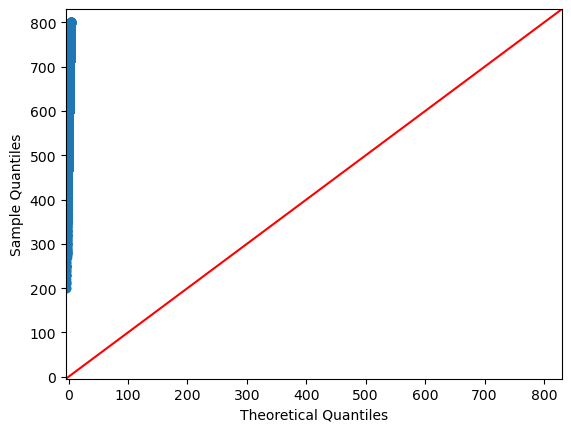

In [27]:
qq_plot(df_category, 'caudal')

In [28]:
prueba_anderson(df_category, 'agua_cruda_p_h')

Statistic: 700.764
Probablemente no Gaussiana a nivel de significancia 15.0%
Probablemente no Gaussiana a nivel de significancia 10.0%
Probablemente no Gaussiana a nivel de significancia 5.0%
Probablemente no Gaussiana a nivel de significancia 2.5%
Probablemente no Gaussiana a nivel de significancia 1.0%


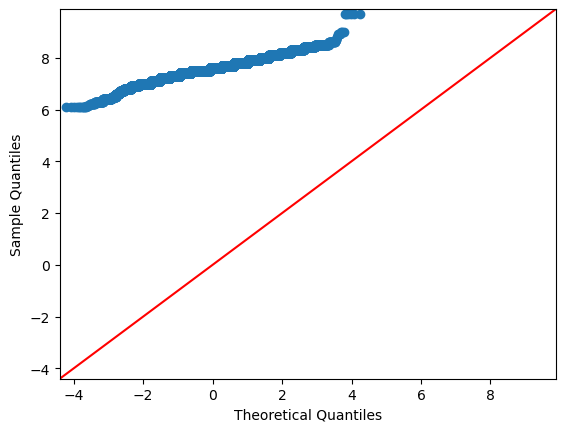

In [29]:
qq_plot(df_category, 'agua_cruda_p_h')

In [30]:
prueba_anderson(df_category, 'vel_viento')

Statistic: 3409.998
Probablemente no Gaussiana a nivel de significancia 15.0%
Probablemente no Gaussiana a nivel de significancia 10.0%
Probablemente no Gaussiana a nivel de significancia 5.0%
Probablemente no Gaussiana a nivel de significancia 2.5%
Probablemente no Gaussiana a nivel de significancia 1.0%


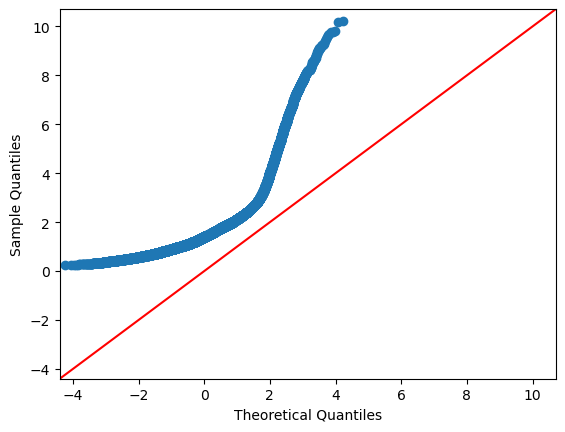

In [31]:
qq_plot(df_category, 'vel_viento')

In [32]:
prueba_anderson(df_category, 'temp_humeda')

Statistic: 205.804
Probablemente no Gaussiana a nivel de significancia 15.0%
Probablemente no Gaussiana a nivel de significancia 10.0%
Probablemente no Gaussiana a nivel de significancia 5.0%
Probablemente no Gaussiana a nivel de significancia 2.5%
Probablemente no Gaussiana a nivel de significancia 1.0%


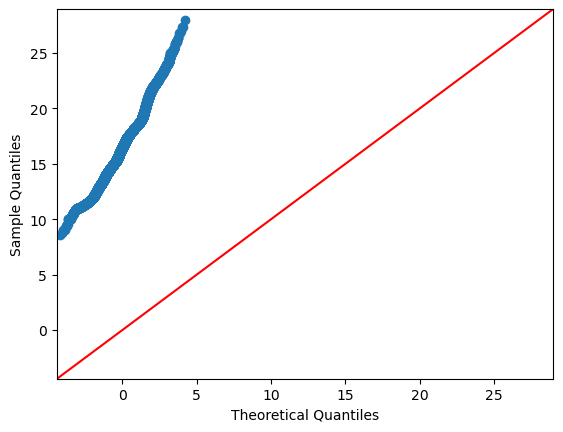

In [33]:
qq_plot(df_category, 'temp_humeda')

**Dataframe completo editado**

In [34]:
prueba_anderson(df_edit_category, 'caudal')

Statistic: 179.902
Probablemente no Gaussiana a nivel de significancia 15.0%
Probablemente no Gaussiana a nivel de significancia 10.0%
Probablemente no Gaussiana a nivel de significancia 5.0%
Probablemente no Gaussiana a nivel de significancia 2.5%
Probablemente no Gaussiana a nivel de significancia 1.0%


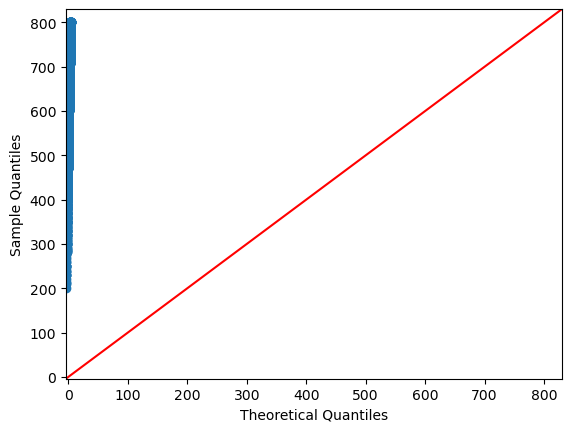

In [35]:
qq_plot(df_edit_category, 'caudal')

In [36]:
prueba_anderson(df_edit_category, 'agua_cruda_p_h')

Statistic: 442.874
Probablemente no Gaussiana a nivel de significancia 15.0%
Probablemente no Gaussiana a nivel de significancia 10.0%
Probablemente no Gaussiana a nivel de significancia 5.0%
Probablemente no Gaussiana a nivel de significancia 2.5%
Probablemente no Gaussiana a nivel de significancia 1.0%


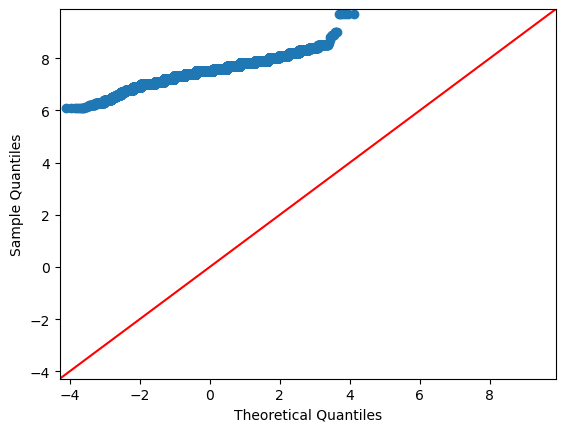

In [37]:
qq_plot(df_edit_category, 'agua_cruda_p_h')

In [38]:
prueba_anderson(df_edit_category, 'vel_viento')

Statistic: 1422.054
Probablemente no Gaussiana a nivel de significancia 15.0%
Probablemente no Gaussiana a nivel de significancia 10.0%
Probablemente no Gaussiana a nivel de significancia 5.0%
Probablemente no Gaussiana a nivel de significancia 2.5%
Probablemente no Gaussiana a nivel de significancia 1.0%


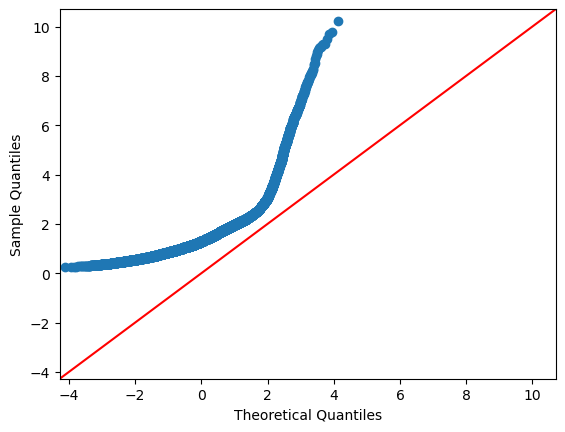

In [39]:
qq_plot(df_edit_category, 'vel_viento')

In [40]:
prueba_anderson(df_edit_category, 'temp_humeda')

Statistic: 384.077
Probablemente no Gaussiana a nivel de significancia 15.0%
Probablemente no Gaussiana a nivel de significancia 10.0%
Probablemente no Gaussiana a nivel de significancia 5.0%
Probablemente no Gaussiana a nivel de significancia 2.5%
Probablemente no Gaussiana a nivel de significancia 1.0%


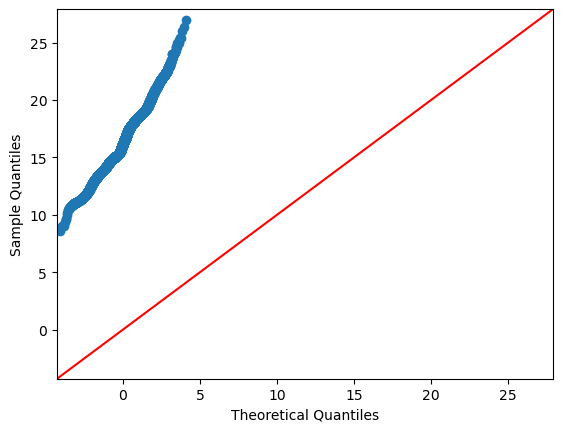

In [41]:
qq_plot(df_edit_category, 'temp_humeda')

**Dataframe sin edición 2017-2022**

In [42]:
prueba_anderson(df_2017_category, 'caudal')

Statistic: 222.107
Probablemente no Gaussiana a nivel de significancia 15.0%
Probablemente no Gaussiana a nivel de significancia 10.0%
Probablemente no Gaussiana a nivel de significancia 5.0%
Probablemente no Gaussiana a nivel de significancia 2.5%
Probablemente no Gaussiana a nivel de significancia 1.0%


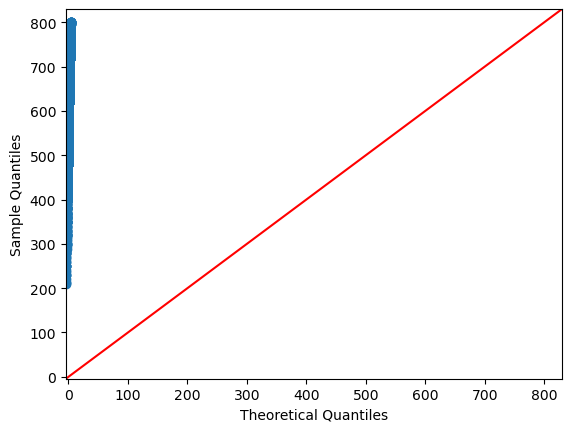

In [43]:
qq_plot(df_2017_category, 'caudal')

In [44]:
prueba_anderson(df_2017_category, 'agua_cruda_p_h')

Statistic: 318.705
Probablemente no Gaussiana a nivel de significancia 15.0%
Probablemente no Gaussiana a nivel de significancia 10.0%
Probablemente no Gaussiana a nivel de significancia 5.0%
Probablemente no Gaussiana a nivel de significancia 2.5%
Probablemente no Gaussiana a nivel de significancia 1.0%


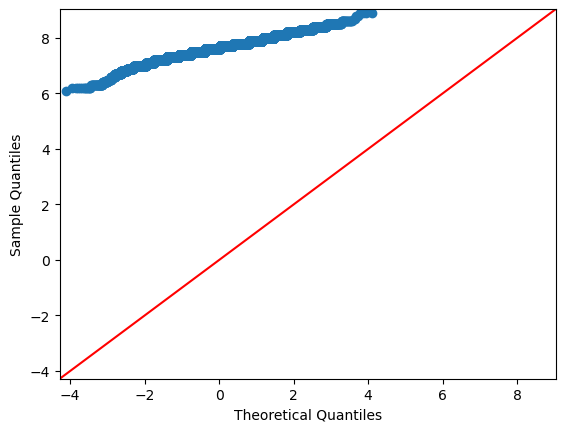

In [45]:
qq_plot(df_2017_category, 'agua_cruda_p_h')

In [46]:
prueba_anderson(df_2017_category, 'vel_viento')

Statistic: 1647.617
Probablemente no Gaussiana a nivel de significancia 15.0%
Probablemente no Gaussiana a nivel de significancia 10.0%
Probablemente no Gaussiana a nivel de significancia 5.0%
Probablemente no Gaussiana a nivel de significancia 2.5%
Probablemente no Gaussiana a nivel de significancia 1.0%


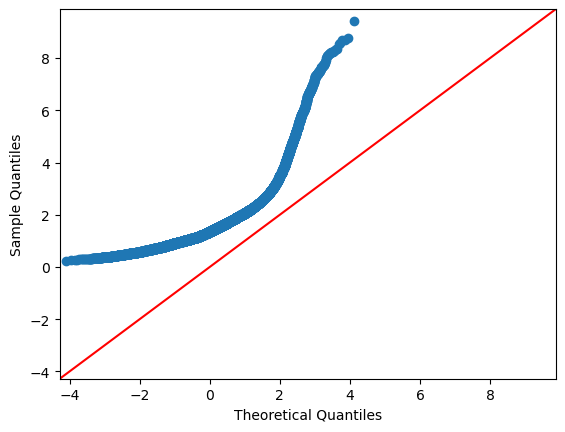

In [47]:
qq_plot(df_2017_category, 'vel_viento')

In [48]:
prueba_anderson(df_2017_category, 'temp_humeda')

Statistic: 300.894
Probablemente no Gaussiana a nivel de significancia 15.0%
Probablemente no Gaussiana a nivel de significancia 10.0%
Probablemente no Gaussiana a nivel de significancia 5.0%
Probablemente no Gaussiana a nivel de significancia 2.5%
Probablemente no Gaussiana a nivel de significancia 1.0%


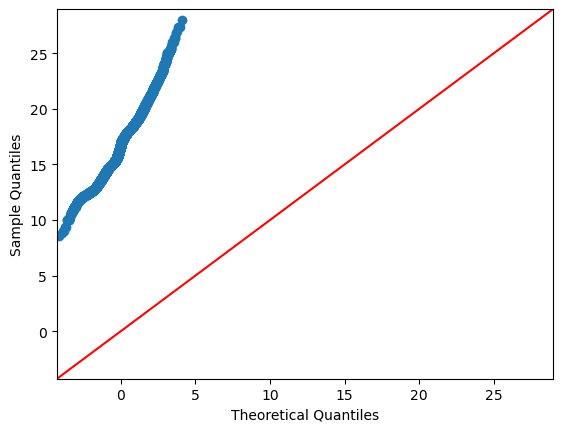

In [49]:
qq_plot(df_2017_category, 'temp_humeda')

**Dataframe con edición 2017-2022**

In [50]:
prueba_anderson(df_edit_2017_category, 'caudal')

Statistic: 167.532
Probablemente no Gaussiana a nivel de significancia 15.0%
Probablemente no Gaussiana a nivel de significancia 10.0%
Probablemente no Gaussiana a nivel de significancia 5.0%
Probablemente no Gaussiana a nivel de significancia 2.5%
Probablemente no Gaussiana a nivel de significancia 1.0%


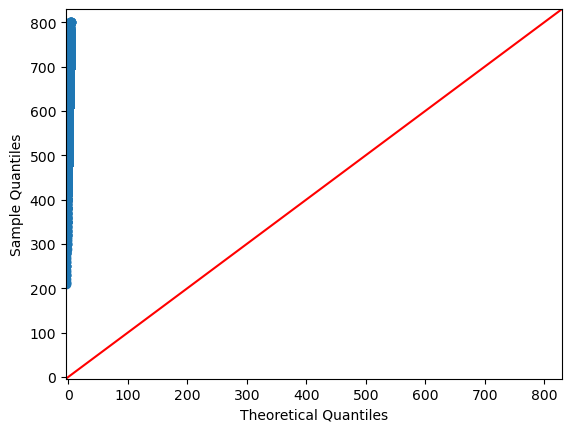

In [51]:
qq_plot(df_edit_2017_category, 'caudal')

In [52]:
prueba_anderson(df_edit_2017_category, 'agua_cruda_p_h')

Statistic: 233.929
Probablemente no Gaussiana a nivel de significancia 15.0%
Probablemente no Gaussiana a nivel de significancia 10.0%
Probablemente no Gaussiana a nivel de significancia 5.0%
Probablemente no Gaussiana a nivel de significancia 2.5%
Probablemente no Gaussiana a nivel de significancia 1.0%


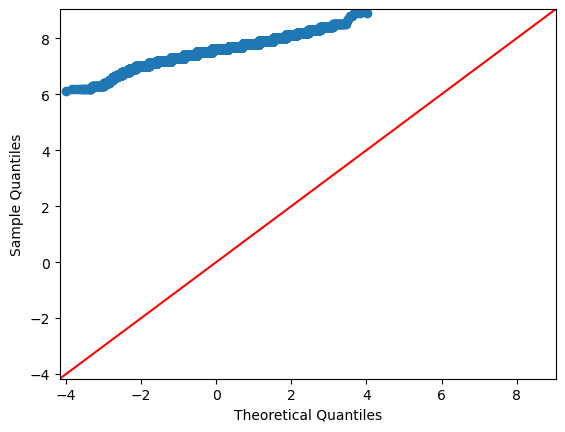

In [53]:
qq_plot(df_edit_2017_category, 'agua_cruda_p_h')

In [54]:
prueba_anderson(df_edit_2017_category, 'vel_viento')

Statistic: 438.206
Probablemente no Gaussiana a nivel de significancia 15.0%
Probablemente no Gaussiana a nivel de significancia 10.0%
Probablemente no Gaussiana a nivel de significancia 5.0%
Probablemente no Gaussiana a nivel de significancia 2.5%
Probablemente no Gaussiana a nivel de significancia 1.0%


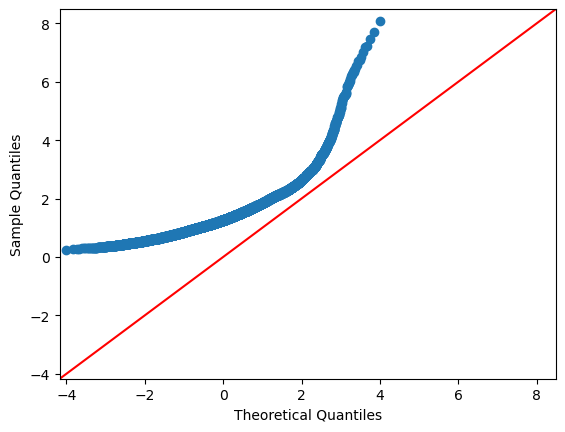

In [55]:
qq_plot(df_edit_2017_category, 'vel_viento')

In [56]:
prueba_anderson(df_edit_2017_category, 'temp_humeda')

Statistic: 329.023
Probablemente no Gaussiana a nivel de significancia 15.0%
Probablemente no Gaussiana a nivel de significancia 10.0%
Probablemente no Gaussiana a nivel de significancia 5.0%
Probablemente no Gaussiana a nivel de significancia 2.5%
Probablemente no Gaussiana a nivel de significancia 1.0%


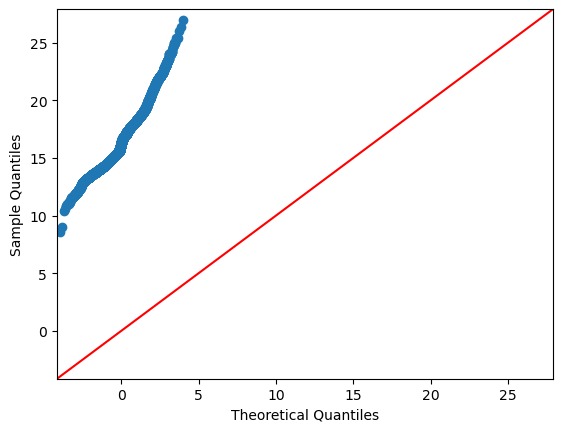

In [57]:
qq_plot(df_edit_2017_category, 'temp_humeda')

Tras un exhaustivo análisis de los resultados obtenidos para cada variable, tanto a través de la aplicación de la prueba anderson como de la visualización mediante el gráfico QQ-plot, hemos evidenciado que ninguna de ellas sigue una distribución normal. En consecuencia, para el tratamiento posterior de los datos, se procederá a implementar un proceso de normalización de todas las variables.

### Implementación de estandarización o normalización

In [58]:
def standar(df, columnas, scaler_standard):
    df_copy = df.copy()
    df_copy[columnas] = scaler_standard.fit_transform(df_copy[columnas])
    return df_copy

In [59]:
scaler_standard1 = StandardScaler()
df_combination = standar(df_category, ['agua_cruda_ntu','agua_cruda_alcalinidad','agua_cruda_conductividad','precipitacion'], scaler_standard1)

In [60]:
def normalization(df, columnas, scaler_norm):
    df_copy = df.copy()
    df_copy[columnas] = scaler_norm.fit_transform(df_copy[columnas])
    return df_copy

In [61]:
scaler_norm1 = MinMaxScaler()
df_combination = normalization(df_combination, ['caudal','agua_cruda_p_h','vel_viento','temp_humeda'], scaler_norm1)

La siguiente función será la implementada para las 3 evaluaciones

In [62]:
def run_norm_stand(dataframes, target_col='dosis_coagulante'):
    for i, df in enumerate(dataframes):
        print(f"Trabajando con el dataframe número {i+1}")
        
        # Preparar datos
        y = df[target_col]
        X = df.drop(target_col, axis=1)
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
        
        # Obtener la muestra más grande
        count_class = Counter(y_train)
        max_sample = max(count_class.values())

        # Determinar el decremento basado en el tamaño de la muestra más grande
        decrement = 0
        if max_sample > 20000:
            decrement = 3000
        elif max_sample <= 20000 and max_sample > 15000:
            decrement = 1500
        else:
            decrement = 1000

        # Ejecutando modelo con SMOTETomek
        print("Ejecutando modelo con SMOTETomek")
        
        # Crear estrategia de muestreo
        sampling_strategy = {}
        decrement_multiplier = 0
        for class_label in sorted(count_class, key=count_class.get, reverse=True):
            sample_value = max_sample - decrement_multiplier*decrement
            # Asegurarse de que el valor de muestreo no sea menor que el conteo de clases original
            sampling_strategy[class_label] = max(sample_value, count_class[class_label])
            decrement_multiplier += 1

        os_us = SMOTETomek(sampling_strategy=sampling_strategy, random_state=42)
        X_train_res, y_train_res = os_us.fit_resample(X_train, y_train)

        print ("Distribution before resampling {}".format(Counter(y_train)))
        print ("Distribution after resampling {}".format(Counter(y_train_res)))

        model = run_model(X_train_res, X_test, y_train_res, y_test)
        pred_y = model.predict(X_test)
        mostrar_resultados(y_test, pred_y)

def run_model(X_train, X_test, y_train, y_test):
    clf_base = RandomForestClassifier()
    clf_base.fit(X_train, y_train)
    return clf_base

def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    LABELS = np.unique(y_test) # Aquí cambiamos 'y' por 'y_test'
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))    

Trabajando con el dataframe número 1
Ejecutando modelo con SMOTETomek
Distribution before resampling Counter({'veinte': 27371, 'veinticinco': 19069, 'treinta': 7728, 'treinta y cinco': 2594, 'quince': 2399, 'cuarenta': 742, 'cuarenta y cinco': 237, 'cincuenta': 94})
Distribution after resampling Counter({'veinte': 26131, 'veinticinco': 23100, 'treinta': 21071, 'treinta y cinco': 18268, 'quince': 15278, 'cuarenta': 12334, 'cuarenta y cinco': 9362, 'cincuenta': 6364})


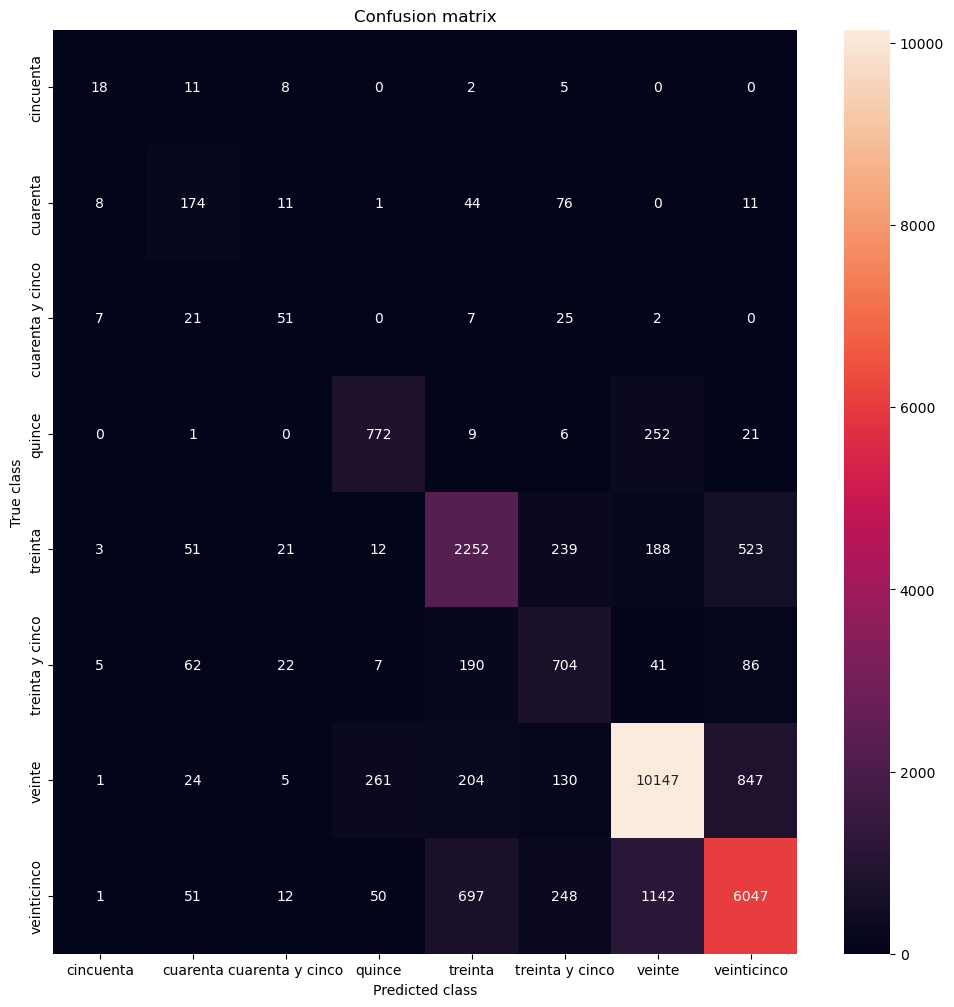

                  precision    recall  f1-score   support

       cincuenta       0.42      0.41      0.41        44
        cuarenta       0.44      0.54      0.48       325
cuarenta y cinco       0.39      0.45      0.42       113
          quince       0.70      0.73      0.71      1061
         treinta       0.66      0.68      0.67      3289
 treinta y cinco       0.49      0.63      0.55      1117
          veinte       0.86      0.87      0.87     11619
     veinticinco       0.80      0.73      0.77      8248

        accuracy                           0.78     25816
       macro avg       0.60      0.63      0.61     25816
    weighted avg       0.79      0.78      0.78     25816



In [63]:
run_norm_stand([df_combination])

### SÓLO ESTANDARIZACIÓN

In [64]:
scaler_standard2 = StandardScaler()
df_standar = standar(df_category, ['agua_cruda_ntu','agua_cruda_alcalinidad','agua_cruda_conductividad','precipitacion', 'caudal','agua_cruda_p_h','vel_viento','temp_humeda'], scaler_standard2)
# df_standar

Trabajando con el dataframe número 1
Ejecutando modelo con SMOTETomek
Distribution before resampling Counter({'veinte': 27371, 'veinticinco': 19069, 'treinta': 7728, 'treinta y cinco': 2594, 'quince': 2399, 'cuarenta': 742, 'cuarenta y cinco': 237, 'cincuenta': 94})
Distribution after resampling Counter({'veinte': 26044, 'veinticinco': 22989, 'treinta': 21103, 'treinta y cinco': 18306, 'quince': 15292, 'cuarenta': 12360, 'cuarenta y cinco': 9370, 'cincuenta': 6370})


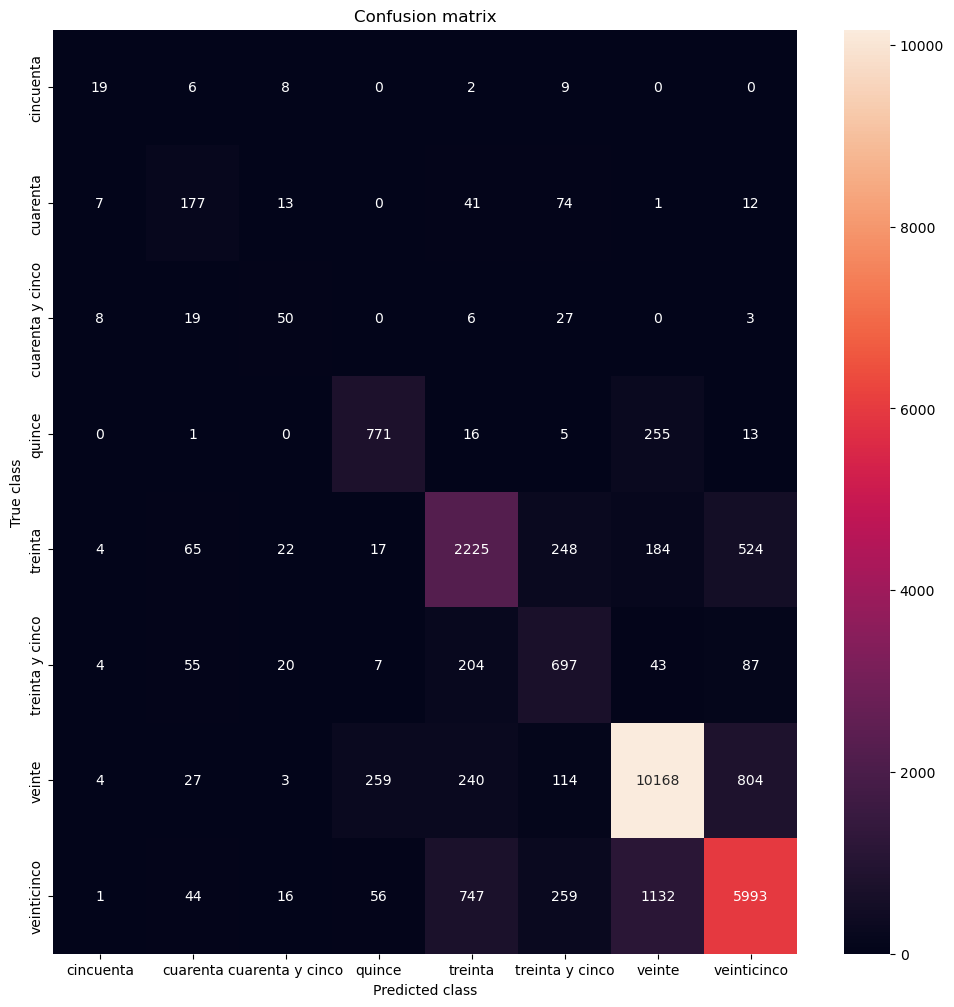

                  precision    recall  f1-score   support

       cincuenta       0.40      0.43      0.42        44
        cuarenta       0.45      0.54      0.49       325
cuarenta y cinco       0.38      0.44      0.41       113
          quince       0.69      0.73      0.71      1061
         treinta       0.64      0.68      0.66      3289
 treinta y cinco       0.49      0.62      0.55      1117
          veinte       0.86      0.88      0.87     11619
     veinticinco       0.81      0.73      0.76      8248

        accuracy                           0.78     25816
       macro avg       0.59      0.63      0.61     25816
    weighted avg       0.78      0.78      0.78     25816



In [65]:
run_norm_stand([df_standar])

### SÓLO NORMALIZACIÓN

In [66]:
scaler_norm2 = MinMaxScaler()
df_norm = normalization(df_category, ['agua_cruda_ntu','agua_cruda_alcalinidad','agua_cruda_conductividad','precipitacion','caudal','agua_cruda_p_h','vel_viento','temp_humeda'], scaler_norm2)
# df_norm

Trabajando con el dataframe número 1
Ejecutando modelo con SMOTETomek
Distribution before resampling Counter({'veinte': 27371, 'veinticinco': 19069, 'treinta': 7728, 'treinta y cinco': 2594, 'quince': 2399, 'cuarenta': 742, 'cuarenta y cinco': 237, 'cincuenta': 94})
Distribution after resampling Counter({'veinte': 25820, 'veinticinco': 22823, 'treinta': 21026, 'treinta y cinco': 18287, 'quince': 15268, 'cuarenta': 12353, 'cuarenta y cinco': 9370, 'cincuenta': 6371})


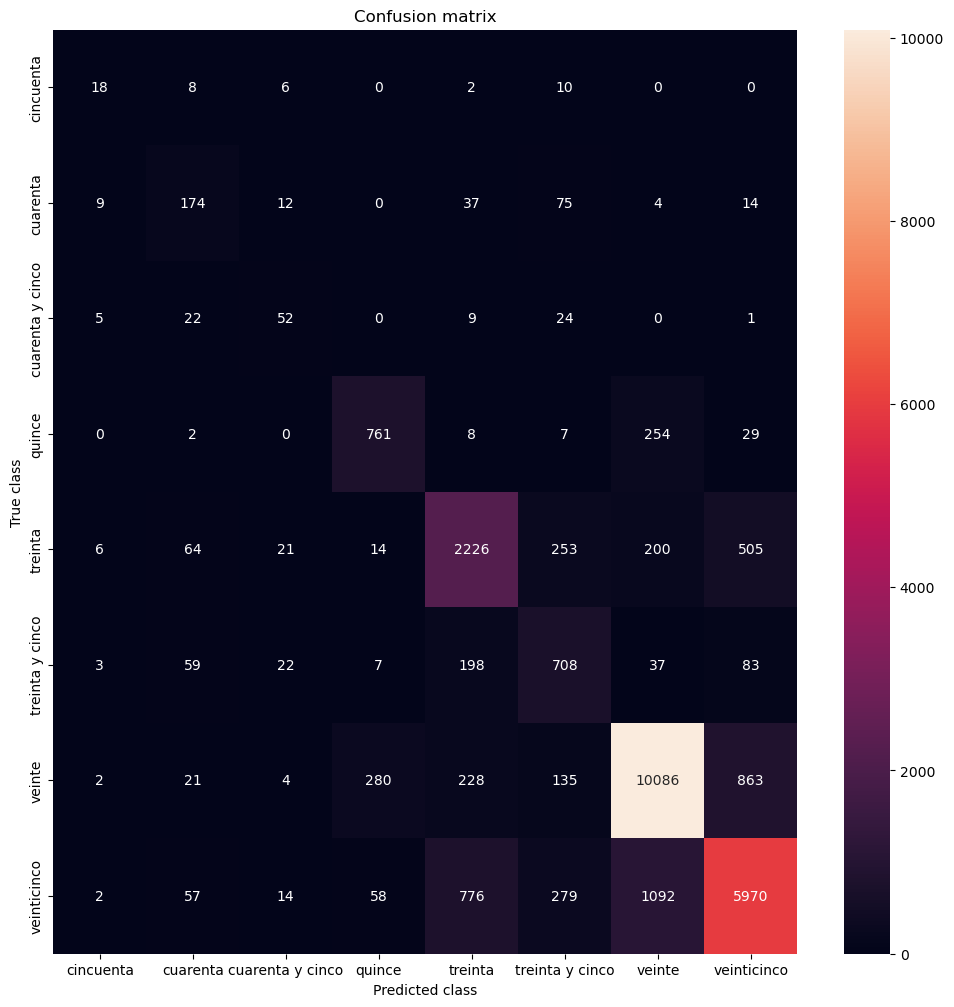

                  precision    recall  f1-score   support

       cincuenta       0.40      0.41      0.40        44
        cuarenta       0.43      0.54      0.48       325
cuarenta y cinco       0.40      0.46      0.43       113
          quince       0.68      0.72      0.70      1061
         treinta       0.64      0.68      0.66      3289
 treinta y cinco       0.47      0.63      0.54      1117
          veinte       0.86      0.87      0.87     11619
     veinticinco       0.80      0.72      0.76      8248

        accuracy                           0.77     25816
       macro avg       0.59      0.63      0.60     25816
    weighted avg       0.78      0.77      0.78     25816



In [67]:
run_norm_stand([df_norm])

### CONCLUSIÓN

Al analizar los resultados, es importante considerar los siguientes puntos:

Para determinar qué resultado es mejor, es importante considerar tanto la precisión como el recall. La precisión mide cuántas de las clasificaciones que el modelo realizó son correctas, mientras que el recall mide cuántos de los casos reales el modelo pudo identificar correctamente. Además, el puntaje F1 es una métrica que combina precisión y recall en un solo número.

A primera vista, parece que el primer modelo tiene un rendimiento ligeramente mejor en general. Aunque todos los modelos tienen la misma precisión ponderada (0.78), el primer modelo tiene la puntuación F1 más alta para varias clases. En particular, las clases 'cincuenta', 'cuarenta', 'cuarenta y cinco', 'veinte' y 'veinticinco' tienen las puntuaciones F1 más altas en el primer modelo en comparación con los otros dos modelos.

1. **Estandarización vs Normalización**: La estandarización y la normalización son técnicas de escalado que transforman las características a una escala común. La elección entre ellas depende en gran medida de los datos y del algoritmo de aprendizaje automático utilizado. En este caso, no parece haber una diferencia notable en el rendimiento entre estas técnicas.

2. **Influencia del algoritmo de aprendizaje automático**: Algunos algoritmos de aprendizaje automático son sensibles a la escala de las características, mientras que otros no. En este caso, se ha utilizado Random Forest, y estos modelos son relativamente insensibles a la escala de las características. Esto podría explicar por qué no se ve una diferencia notable entre las diferentes técnicas de preprocesamiento.

En resumen, dadas estas condiciones y resultados, podemos concluir que la estandarización y la normalización no parecen tener un impacto significativo.

Por lo tanto, se procederá con análisis con varios algoritmose incluso la optimización modelos aplicando hiperparámetros o realizando combinación de varios algoritmos para crear un modelo que obtenga mejores resultados con los dataframes sin aplicar ni estandarización ni normalización y si los algoritmos lo requieren se hará en el proceso.

In [68]:
def test_sampling_strategies(dataframes, decrements=[1000, 1500, 2000, 2500, 3000], target_col='dosis_coagulante'):
    # Lista para almacenar los resultados
    all_results = []

    for i, df in enumerate(dataframes):
        print(f"Trabajando con el dataframe número {i+1}")

        # Preparar datos
        y = df[target_col]
        X = df.drop(target_col, axis=1)
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

        # Obtener la muestra más grande
        count_class = Counter(y_train)
        max_sample = max(count_class.values())

        # Lista para almacenar los resultados de este dataframe
        results = []

        # Ciclo para probar cada valor de decremento
        for decrement in decrements:
            print(f"Probando decremento de: {decrement}")

            # Crear estrategia de muestreo
            sampling_strategy = {}
            decrement_multiplier = 0
            for class_label in sorted(count_class, key=count_class.get, reverse=True):
                sample_value = max_sample - decrement_multiplier*decrement
                # Asegurarse de que el valor de muestreo no sea menor que el conteo de clases original
                sampling_strategy[class_label] = max(sample_value, count_class[class_label])
                decrement_multiplier += 1

            # Resampling y entrenamiento del modelo
            os_us = SMOTETomek(sampling_strategy=sampling_strategy, random_state=42)
            X_train_res, y_train_res = os_us.fit_resample(X_train, y_train)

            model = run_model(X_train_res, X_test, y_train_res, y_test)
            pred_y = model.predict(X_test)

            # Evaluar el modelo
            report = classification_report(y_test, pred_y, output_dict=True)
            results.append((decrement, report['weighted avg']))

        # Añadir los resultados de este dataframe a la lista general
        all_results.append((i+1, results))

    # Mostrar los resultados
    for df_num, results in all_results:
        print(f"\nResultados para el dataframe número {df_num}:")
        for decrement, result in results:
            print(f"Decremento: {decrement}, Resultado: {result}")

    return all_results


In [69]:
# dataframes = [df_category, df_edit_category, df_2017_category]
# all_results = test_sampling_strategies(dataframes, decrements=[1000, 1500, 2000, 2500, 3000])

In [70]:
# dataframes = [df_category]
# all_results = test_sampling_strategies(dataframes, decrements=[2500, 2600, 2700,2800,2900])

In [71]:
# dataframes = [df_edit_category]
# all_results = test_sampling_strategies(dataframes, decrements=[1500, 1600, 1700, 1800, 1900])

In [72]:
# dataframes = [df_2017_category]
# all_results = test_sampling_strategies(dataframes, decrements=[2000, 2100, 2200, 2300, 2400])

In [73]:
def balance_and_save(df, decrement, filepath, target_col='dosis_coagulante'):
    # Preparar los datos
    y = df[target_col]
    X = df.drop(target_col, axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

    # Obtener la muestra más grande
    count_class = Counter(y)
    max_sample = max(count_class.values())

    sampling_strategy = {}
    decrement_multiplier = 0
    for class_label in sorted(count_class, key=count_class.get, reverse=True):
        sample_value = max_sample - decrement_multiplier*decrement
        # Asegurarse de que el valor de muestreo no sea menor que el conteo de clases original
        sampling_strategy[class_label] = max(sample_value, count_class[class_label])
        decrement_multiplier += 1

    # Ejecutando SMOTETomek con la estrategia de muestreo
    os_us = SMOTETomek(sampling_strategy=sampling_strategy, random_state=42)
    X_res, y_res = os_us.fit_resample(X, y)
    print ("Distribution before resampling {}".format(Counter(y)))
    print ("Distribution after resampling {}".format(Counter(y_res)))

    # Crear un nuevo DataFrame con los datos balanceados
    balanced_df = pd.concat([X_res, y_res], axis=1)

    # Guardar el DataFrame como un archivo CSV
    balanced_df.to_csv(filepath, index=False)

In [74]:
balance_and_save(df_category, 5000, '../data/df_category.csv')
balance_and_save(df_edit_category, 2000, '../data_edit/df_edit_category.csv')
balance_and_save(df_2017_category, 3100, '../data/df_2017_category.csv')

Distribution before resampling Counter({'veinte': 38990, 'veinticinco': 27317, 'treinta': 11017, 'treinta y cinco': 3711, 'quince': 3460, 'cuarenta': 1067, 'cuarenta y cinco': 350, 'cincuenta': 138})
Distribution after resampling Counter({'veinte': 36500, 'veinticinco': 31422, 'treinta': 28271, 'treinta y cinco': 23716, 'quince': 18751, 'cuarenta': 13885, 'cuarenta y cinco': 8918, 'cincuenta': 3963})
Distribution before resampling Counter({'veinte': 18309, 'veinticinco': 16991, 'treinta': 9177, 'treinta y cinco': 3710, 'quince': 1831, 'cuarenta': 1067, 'cuarenta y cinco': 350, 'cincuenta': 138})
Distribution after resampling Counter({'veinte': 16299, 'veinticinco': 14794, 'treinta': 13331, 'treinta y cinco': 11981, 'quince': 10144, 'cuarenta': 8177, 'cuarenta y cinco': 6241, 'cincuenta': 4297})
Distribution before resampling Counter({'veinte': 25384, 'veinticinco': 15145, 'treinta': 6850, 'treinta y cinco': 2450, 'quince': 1092, 'cuarenta': 685, 'cuarenta y cinco': 150, 'cincuenta': 52

In [75]:
y = df_edit_2017_category['dosis_coagulante']
X = df_edit_2017_category.drop('dosis_coagulante', axis=1)

sm = SMOTE(sampling_strategy='auto', k_neighbors=3, random_state=1)
X_res, y_res = sm.fit_resample(X, y)

print ("Distribution before resampling {}".format(Counter(y)))
print ("Distribution after resampling {}".format(Counter(y_res)))

# Crear un nuevo DataFrame con los datos balanceados
balanced_df = pd.concat([X_res, y_res], axis=1)
balanced_df.to_csv('../data_edit/df_edit_2017_category.csv', index=False, sep=',')

Distribution before resampling Counter({'veinte': 11661, 'veinticinco': 10161, 'treinta': 6404, 'treinta y cinco': 2449, 'quince': 712, 'cuarenta': 685, 'cuarenta y cinco': 150, 'cincuenta': 52})
Distribution after resampling Counter({'veinte': 11661, 'veinticinco': 11661, 'treinta': 11661, 'treinta y cinco': 11661, 'cuarenta': 11661, 'cuarenta y cinco': 11661, 'quince': 11661, 'cincuenta': 11661})


In [76]:
df_category.to_csv('../data/df_category_without_balance.csv', index=False)